In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
FIGSIZE_SENSOR = (18, 3)

# Load dataset

In [3]:
PATH = 'data/processminer-rare-event-mts - data.csv'
PATH_OUT = 'data/_processminer-rare-event-mts-data_cleaned.csv'

df_data = pd.read_csv(PATH)

print(df_data.shape)

df_data

(18398, 63)


time  y        x1        x2        x3          x4        x5  \
0        5/1/99 0:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1        5/1/99 0:02  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2        5/1/99 0:04  0  0.363848 -4.681394 -4.353147   14.127998 -0.138636   
3        5/1/99 0:06  0  0.301590 -4.758934 -4.023612   13.161567 -0.148142   
4        5/1/99 0:08  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...              ... ..       ...       ...       ...         ...       ...   
18393  5/28/99 23:58  0 -0.877442  0.786430  0.406426  135.301215  0.112295   
18394   5/29/99 0:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395   5/29/99 0:02  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396   5/29/99 0:04  0 -0.822842  0.419383  0.387263  135.658942  0.199422   
18397   5/29/99 0:06  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6        x7        x8  ...        x52       x53       x54  \
0     -20.669883  0.000732 -0.061114  ...  10.091721  0.053279 -4.936434   
1     -18.758079  0.000732 -0.061114  ...  10.095871  0.062801 -4.937179   
2     -17.836632  0.010803 -0.061114  ...  10.100265  0.072322 -4.937924   
3     -18.517601  0.002075 -0.061114  ...  10.104660  0.081600 -4.938669   
4     -17.505913  0.000732 -0.061114  ...  10.109054  0.091121 -4.939414   
...          ...       ...       ...  ...        ...       ...       ...   
18393  26.300392 -0.159185  0.058823  ...  -0.773514 -0.752385  2.682413   
18394  25.678597 -0.159185  0.058823  ...  -0.773514 -0.752385  2.683338   
18395  25.056801 -0.159185  0.048752  ...  -0.773514 -0.752385  2.684263   
18396  24.435005 -0.159185  0.048752  ...  -0.773514 -0.752385  2.685189   
18397  24.712960 -0.159185  0.048752  ...  -0.773514 -0.752385  2.686114   

             x55        x56       x57       x58       x59       x60  x61  
0     -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076    0  
1     -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083    0  
2     -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090    0  
3     -35.954281  21.672449  3.986095  0.033721  2.554880  0.006097    0  
4     -37.724789  21.907251  3.601573  0.033777  1.410494  0.006105    0  
...          ...        ...       ...       ...       ...       ...  ...  
18393   6.944644 -37.795661 -0.860218  0.010220  0.895685 -0.011242    0  
18394   0.507755 -39.357199 -0.915699  0.010620  0.175348 -0.011235    0  
18395   2.809146 -39.357199 -1.409596  0.013323  0.621020 -0.011228    0  
18396   2.164859 -39.357199 -0.860218  0.012888  1.390902 -0.011221    0  
18397   1.416690 -39.357199 -0.732044  0.012453  0.418993 -0.011214    0  

[18398 rows x 63 columns]

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

There are no missing values in the dataset!

In [5]:
df_data.describe()

y            x1            x2            x3            x4  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006740      0.011824      0.157986      0.569300     -9.958345   
std        0.081822      0.742875      4.939762      5.937178    131.033712   
min        0.000000     -3.787279    -17.316550    -18.198509   -322.781610   
25%        0.000000     -0.405681     -2.158235     -3.537054   -111.378372   
50%        0.000000      0.128245     -0.075505     -0.190683    -14.881585   
75%        0.000000      0.421222      2.319297      3.421223     92.199134   
max        1.000000      3.054156     16.742105     15.900116    334.694098   

                 x5            x6            x7            x8            x9  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006518      2.387533      0.001647     -0.004125     -0.003056   
std        0.634054     37.104012      0.108870      0.075460      0.156047   
min       -1.623988   -279.408440     -0.429273     -0.451141     -0.120087   
25%       -0.446787    -24.345268     -0.058520     -0.051043     -0.059966   
50%       -0.120745     10.528435     -0.009339     -0.000993     -0.030057   
75%        0.325152     32.172974      0.060515      0.038986      0.001990   
max        4.239385     96.060768      1.705590      0.788826      4.060033   

       ...           x52           x53           x54           x55  \
count  ...  18398.000000  18398.000000  18398.000000  18398.000000   
mean   ...      0.380519      0.360246      0.173708      2.379154   
std    ...      6.211598     14.174273      3.029516     67.940694   
min    ...   -187.943440  -1817.595500     -8.210370   -230.574030   
25%    ...     -3.672684     -1.928166      0.487780    -40.050046   
50%    ...      0.294846      0.143612      0.702299     17.471317   
75%    ...      5.109543      3.230770      2.675751     44.093387   
max    ...     14.180588     11.148006      6.637265    287.252017   

                x56           x57           x58           x59           x60  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       9.234953      0.233493     -0.001861     -0.061522      0.001258   
std       81.274103      2.326838      0.048732     10.394085      0.004721   
min     -269.039500    -12.640370     -0.149790   -100.810500     -0.012229   
25%      -45.519149     -1.598804      0.000470      0.295023     -0.001805   
50%        1.438806      0.085826      0.012888      0.734591      0.000710   
75%       63.209681      2.222118      0.020991      1.266506      0.004087   
max      252.147455      6.922008      0.067249      6.985460      0.020510   

                x61  
count  18398.000000  
mean       0.001033  
std        0.032120  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 62 columns]

## Analyze Classes

In [6]:
df_data['y'].value_counts()

0    18274
1      124
Name: y, dtype: int64

## Index Data with timestamp

In [7]:
FORMAT_DATETIME = '%m/%d/%y %H:%M'

In [8]:
df_data['datetime'] = pd.to_datetime(df_data['time'], format=FORMAT_DATETIME)
df_data.sort_values(by='datetime', ascending=True)
df_data.set_index('datetime', inplace=True)

df_data

time  y        x1        x2        x3  \
datetime                                                              
1999-05-01 00:00:00    5/1/99 0:00  0  0.376665 -4.596435 -4.095756   
1999-05-01 00:02:00    5/1/99 0:02  0  0.475720 -4.542502 -4.018359   
1999-05-01 00:04:00    5/1/99 0:04  0  0.363848 -4.681394 -4.353147   
1999-05-01 00:06:00    5/1/99 0:06  0  0.301590 -4.758934 -4.023612   
1999-05-01 00:08:00    5/1/99 0:08  0  0.265578 -4.749928 -4.333150   
...                            ... ..       ...       ...       ...   
1999-05-28 23:58:00  5/28/99 23:58  0 -0.877442  0.786430  0.406426   
1999-05-29 00:00:00   5/29/99 0:00  0 -0.843988  0.633086  0.561918   
1999-05-29 00:02:00   5/29/99 0:02  0 -0.826547  0.450126  0.334582   
1999-05-29 00:04:00   5/29/99 0:04  0 -0.822842  0.419383  0.387263   
1999-05-29 00:06:00   5/29/99 0:06  0 -0.840981  0.582710  0.593416   

                             x4        x5         x6        x7        x8  ...  \
datetime                                                                  ...   
1999-05-01 00:00:00   13.497687 -0.118830 -20.669883  0.000732 -0.061114  ...   
1999-05-01 00:02:00   16.230659 -0.128733 -18.758079  0.000732 -0.061114  ...   
1999-05-01 00:04:00   14.127998 -0.138636 -17.836632  0.010803 -0.061114  ...   
1999-05-01 00:06:00   13.161567 -0.148142 -18.517601  0.002075 -0.061114  ...   
1999-05-01 00:08:00   15.267340 -0.155314 -17.505913  0.000732 -0.061114  ...   
...                         ...       ...        ...       ...       ...  ...   
1999-05-28 23:58:00  135.301215  0.112295  26.300392 -0.159185  0.058823  ...   
1999-05-29 00:00:00  133.228949  0.141332  25.678597 -0.159185  0.058823  ...   
1999-05-29 00:02:00  134.977973  0.170370  25.056801 -0.159185  0.048752  ...   
1999-05-29 00:04:00  135.658942  0.199422  24.435005 -0.159185  0.048752  ...   
1999-05-29 00:06:00  136.339880  0.228460  24.712960 -0.159185  0.048752  ...   

                           x52       x53       x54        x55        x56  \
datetime                                                                   
1999-05-01 00:00:00  10.091721  0.053279 -4.936434 -24.590146  18.515436   
1999-05-01 00:02:00  10.095871  0.062801 -4.937179 -32.413266  22.760065   
1999-05-01 00:04:00  10.100265  0.072322 -4.937924 -34.183774  27.004663   
1999-05-01 00:06:00  10.104660  0.081600 -4.938669 -35.954281  21.672449   
1999-05-01 00:08:00  10.109054  0.091121 -4.939414 -37.724789  21.907251   
...                        ...       ...       ...        ...        ...   
1999-05-28 23:58:00  -0.773514 -0.752385  2.682413   6.944644 -37.795661   
1999-05-29 00:00:00  -0.773514 -0.752385  2.683338   0.507755 -39.357199   
1999-05-29 00:02:00  -0.773514 -0.752385  2.684263   2.809146 -39.357199   
1999-05-29 00:04:00  -0.773514 -0.752385  2.685189   2.164859 -39.357199   
1999-05-29 00:06:00  -0.773514 -0.752385  2.686114   1.416690 -39.357199   

                          x57       x58       x59       x60  x61  
datetime                                                          
1999-05-01 00:00:00  3.473400  0.033444  0.953219  0.006076    0  
1999-05-01 00:02:00  2.682933  0.033536  1.090502  0.006083    0  
1999-05-01 00:04:00  3.537487  0.033629  1.840540  0.006090    0  
1999-05-01 00:06:00  3.986095  0.033721  2.554880  0.006097    0  
1999-05-01 00:08:00  3.601573  0.033777  1.410494  0.006105    0  
...                       ...       ...       ...       ...  ...  
1999-05-28 23:58:00 -0.860218  0.010220  0.895685 -0.011242    0  
1999-05-29 00:00:00 -0.915699  0.010620  0.175348 -0.011235    0  
1999-05-29 00:02:00 -1.409596  0.013323  0.621020 -0.011228    0  
1999-05-29 00:04:00 -0.860218  0.012888  1.390902 -0.011221    0  
1999-05-29 00:06:00 -0.732044  0.012453  0.418993 -0.011214    0  

[18398 rows x 63 columns]

In [9]:
def getSensorColnames():
    cols = list(df_data.columns)
    cols = list( set(cols) - set(['time', 'y']) )
    cols = sorted(cols)
    return cols


## Analyze Timestamp

1999-05-01 00:00:00  to  1999-05-29 00:06:00

count    18397.000000
mean       131.519269
std        410.082780
min        120.000000
25%        120.000000
50%        120.000000
75%        120.000000
max      50040.000000
Name: time, dtype: float64


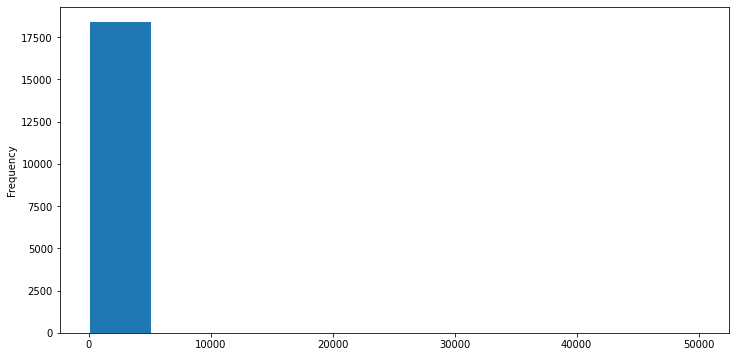

In [10]:
series_datetime = pd.to_datetime(df_data['time'], format=FORMAT_DATETIME)
print( series_datetime.min(), ' to ', series_datetime.max() )

print("")

time_diffs = series_datetime.diff().dropna().dt.total_seconds()
print(time_diffs.describe())

plt.figure(figsize=(12, 6))
_ = time_diffs.plot.hist()

In [11]:
time_diffs.value_counts()

120.0      18290
240.0         11
600.0         11
840.0          8
720.0          7
1560.0         6
960.0          6
1080.0         5
360.0          5
1680.0         5
480.0          5
1920.0         4
1440.0         4
2280.0         4
2760.0         2
4320.0         2
1200.0         2
2040.0         2
2640.0         2
3240.0         1
5160.0         1
6960.0         1
1320.0         1
3480.0         1
2160.0         1
3120.0         1
4080.0         1
50040.0        1
6480.0         1
2520.0         1
6600.0         1
3360.0         1
12720.0        1
7920.0         1
3000.0         1
Name: time, dtype: int64

Most of the values are recorded every 2 minutes. However, there are few inconsistency.

In [12]:
required_records = int( (series_datetime.max()-series_datetime.min()).total_seconds()/120 )

print(f"There should be around {required_records} records in the dataset as compared to {df_data.shape[0]}.")

There should be around 20163 records in the dataset as compared to 18398.


## Reindex dataset every 2 minutes

In [13]:
start = pd.datetime(1999,5,1,0,0,0)
end = pd.datetime(1999,5,29,0,6,0)
new_index = pd.date_range(start, end, freq='2min')

print(new_index.shape)
new_index

(20164,)


/home/gagan/PythonEnv/env_deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.
/home/gagan/PythonEnv/env_deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


DatetimeIndex(['1999-05-01 00:00:00', '1999-05-01 00:02:00',
               '1999-05-01 00:04:00', '1999-05-01 00:06:00',
               '1999-05-01 00:08:00', '1999-05-01 00:10:00',
               '1999-05-01 00:12:00', '1999-05-01 00:14:00',
               '1999-05-01 00:16:00', '1999-05-01 00:18:00',
               ...
               '1999-05-28 23:48:00', '1999-05-28 23:50:00',
               '1999-05-28 23:52:00', '1999-05-28 23:54:00',
               '1999-05-28 23:56:00', '1999-05-28 23:58:00',
               '1999-05-29 00:00:00', '1999-05-29 00:02:00',
               '1999-05-29 00:04:00', '1999-05-29 00:06:00'],
              dtype='datetime64[ns]', length=20164, freq='2T')

In [14]:
df_data_new = df_data.reindex(new_index)

print(df_data_new.shape)
y_reindexed = df_data_new['y'].copy()

df_data_new

(20164, 63)


time    y        x1        x2        x3  \
1999-05-01 00:00:00    5/1/99 0:00  0.0  0.376665 -4.596435 -4.095756   
1999-05-01 00:02:00    5/1/99 0:02  0.0  0.475720 -4.542502 -4.018359   
1999-05-01 00:04:00    5/1/99 0:04  0.0  0.363848 -4.681394 -4.353147   
1999-05-01 00:06:00    5/1/99 0:06  0.0  0.301590 -4.758934 -4.023612   
1999-05-01 00:08:00    5/1/99 0:08  0.0  0.265578 -4.749928 -4.333150   
...                            ...  ...       ...       ...       ...   
1999-05-28 23:58:00  5/28/99 23:58  0.0 -0.877442  0.786430  0.406426   
1999-05-29 00:00:00   5/29/99 0:00  0.0 -0.843988  0.633086  0.561918   
1999-05-29 00:02:00   5/29/99 0:02  0.0 -0.826547  0.450126  0.334582   
1999-05-29 00:04:00   5/29/99 0:04  0.0 -0.822842  0.419383  0.387263   
1999-05-29 00:06:00   5/29/99 0:06  0.0 -0.840981  0.582710  0.593416   

                             x4        x5         x6        x7        x8  ...  \
1999-05-01 00:00:00   13.497687 -0.118830 -20.669883  0.000732 -0.061114  ...   
1999-05-01 00:02:00   16.230659 -0.128733 -18.758079  0.000732 -0.061114  ...   
1999-05-01 00:04:00   14.127998 -0.138636 -17.836632  0.010803 -0.061114  ...   
1999-05-01 00:06:00   13.161567 -0.148142 -18.517601  0.002075 -0.061114  ...   
1999-05-01 00:08:00   15.267340 -0.155314 -17.505913  0.000732 -0.061114  ...   
...                         ...       ...        ...       ...       ...  ...   
1999-05-28 23:58:00  135.301215  0.112295  26.300392 -0.159185  0.058823  ...   
1999-05-29 00:00:00  133.228949  0.141332  25.678597 -0.159185  0.058823  ...   
1999-05-29 00:02:00  134.977973  0.170370  25.056801 -0.159185  0.048752  ...   
1999-05-29 00:04:00  135.658942  0.199422  24.435005 -0.159185  0.048752  ...   
1999-05-29 00:06:00  136.339880  0.228460  24.712960 -0.159185  0.048752  ...   

                           x52       x53       x54        x55        x56  \
1999-05-01 00:00:00  10.091721  0.053279 -4.936434 -24.590146  18.515436   
1999-05-01 00:02:00  10.095871  0.062801 -4.937179 -32.413266  22.760065   
1999-05-01 00:04:00  10.100265  0.072322 -4.937924 -34.183774  27.004663   
1999-05-01 00:06:00  10.104660  0.081600 -4.938669 -35.954281  21.672449   
1999-05-01 00:08:00  10.109054  0.091121 -4.939414 -37.724789  21.907251   
...                        ...       ...       ...        ...        ...   
1999-05-28 23:58:00  -0.773514 -0.752385  2.682413   6.944644 -37.795661   
1999-05-29 00:00:00  -0.773514 -0.752385  2.683338   0.507755 -39.357199   
1999-05-29 00:02:00  -0.773514 -0.752385  2.684263   2.809146 -39.357199   
1999-05-29 00:04:00  -0.773514 -0.752385  2.685189   2.164859 -39.357199   
1999-05-29 00:06:00  -0.773514 -0.752385  2.686114   1.416690 -39.357199   

                          x57       x58       x59       x60  x61  
1999-05-01 00:00:00  3.473400  0.033444  0.953219  0.006076  0.0  
1999-05-01 00:02:00  2.682933  0.033536  1.090502  0.006083  0.0  
1999-05-01 00:04:00  3.537487  0.033629  1.840540  0.006090  0.0  
1999-05-01 00:06:00  3.986095  0.033721  2.554880  0.006097  0.0  
1999-05-01 00:08:00  3.601573  0.033777  1.410494  0.006105  0.0  
...                       ...       ...       ...       ...  ...  
1999-05-28 23:58:00 -0.860218  0.010220  0.895685 -0.011242  0.0  
1999-05-29 00:00:00 -0.915699  0.010620  0.175348 -0.011235  0.0  
1999-05-29 00:02:00 -1.409596  0.013323  0.621020 -0.011228  0.0  
1999-05-29 00:04:00 -0.860218  0.012888  1.390902 -0.011221  0.0  
1999-05-29 00:06:00 -0.732044  0.012453  0.418993 -0.011214  0.0  

[20164 rows x 63 columns]

## Visualize Data

/home/gagan/PythonEnv/env_deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


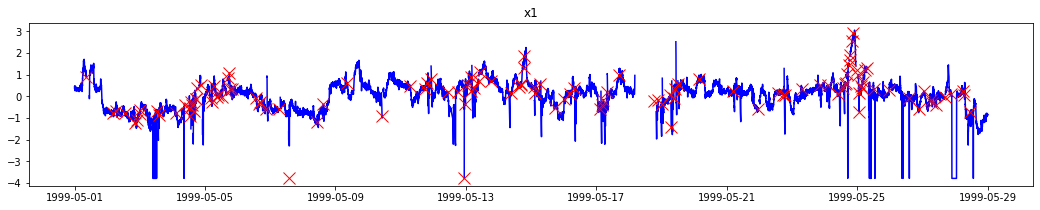

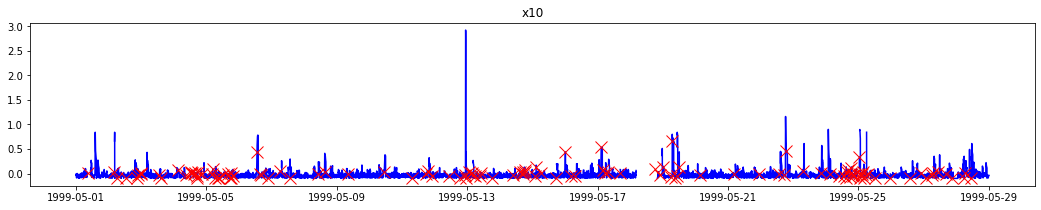

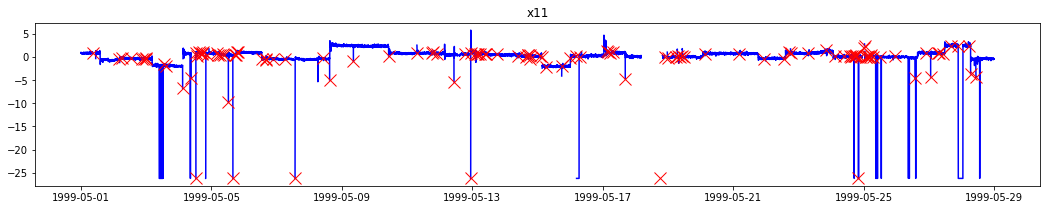

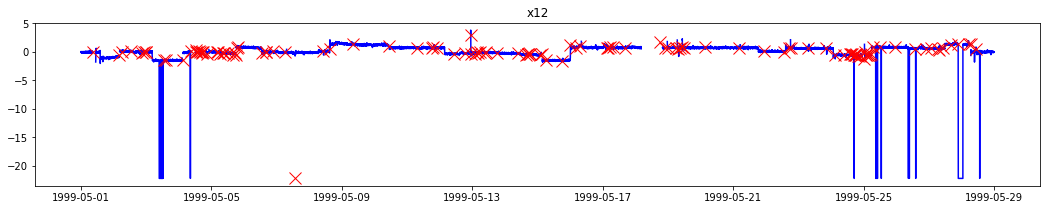

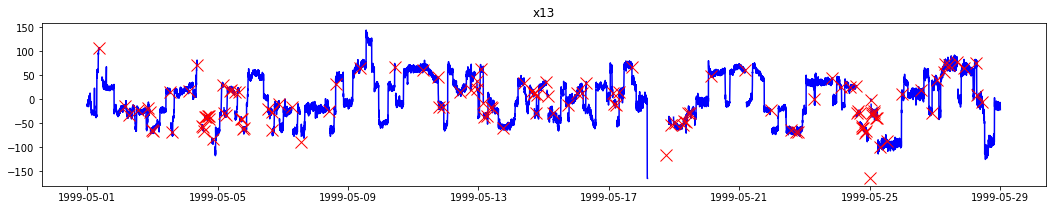

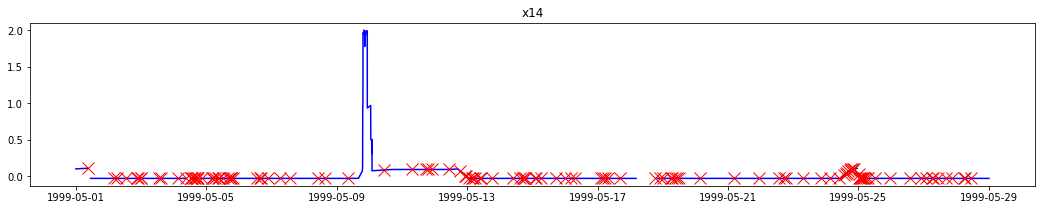

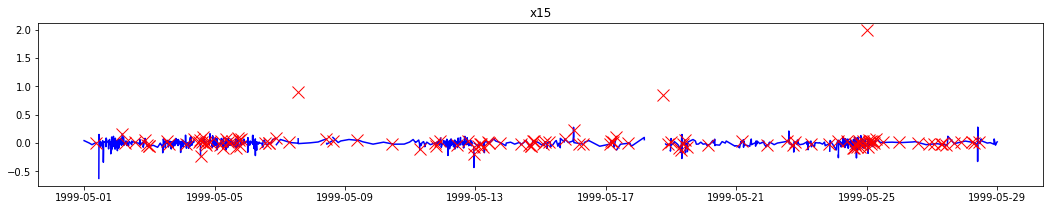

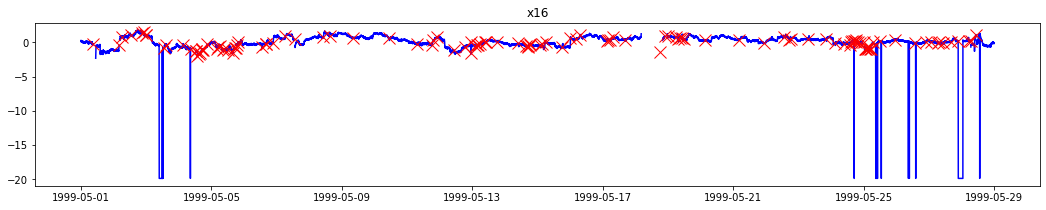

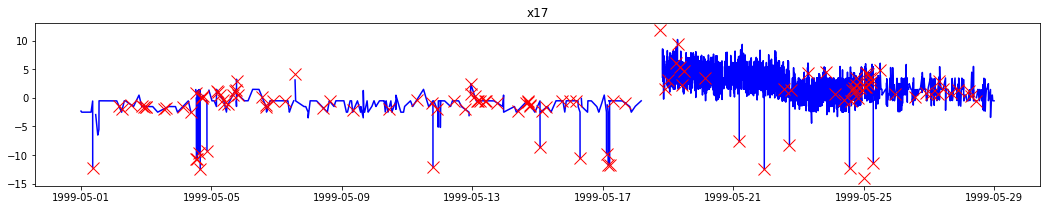

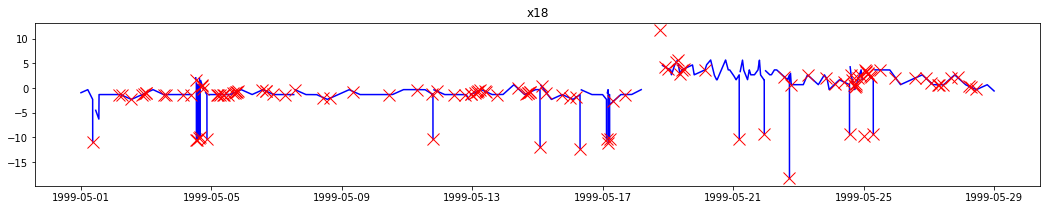

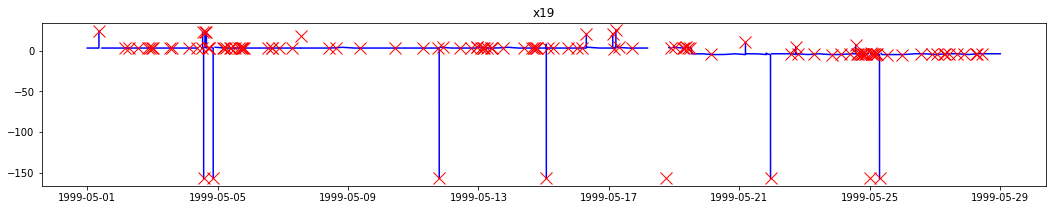

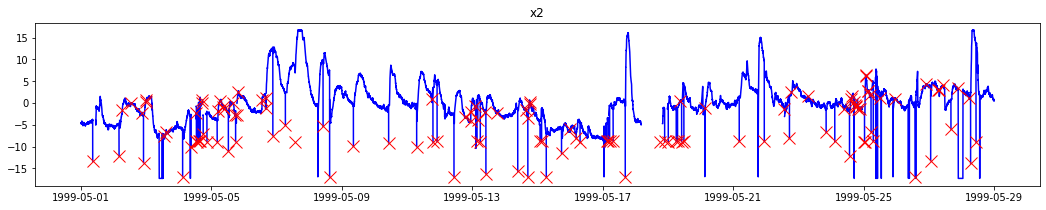

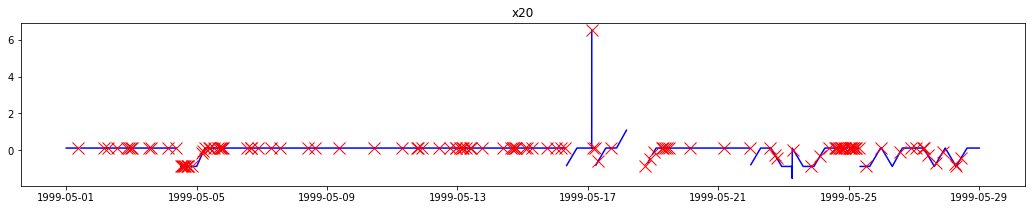

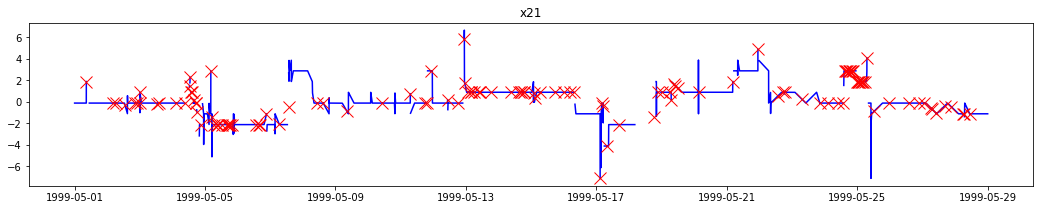

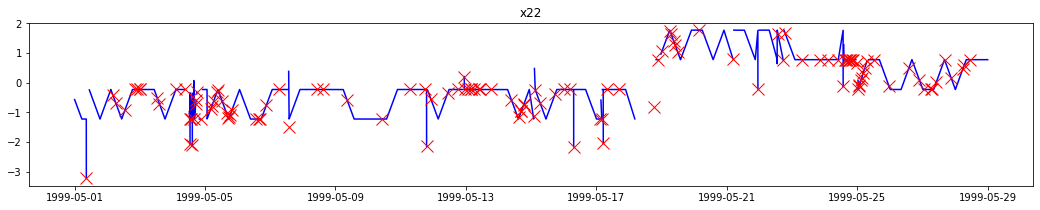

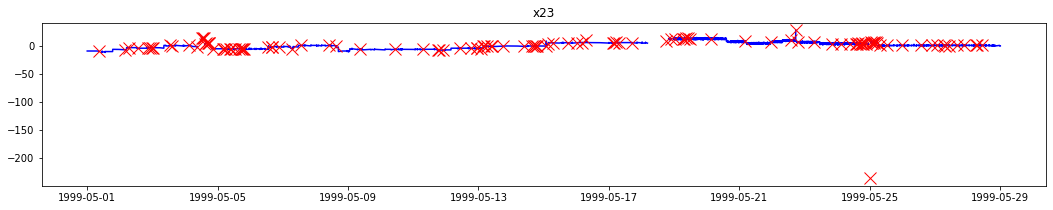

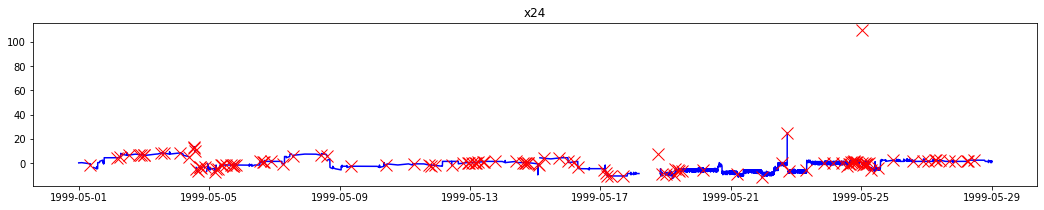

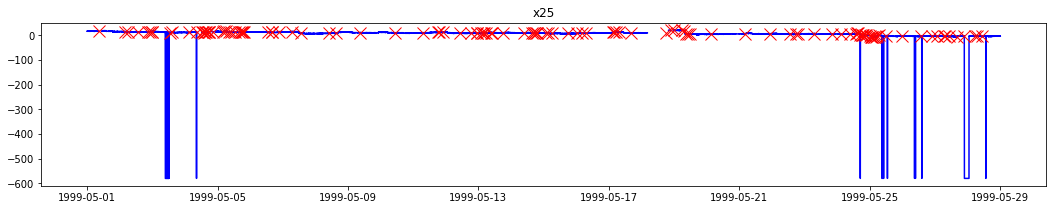

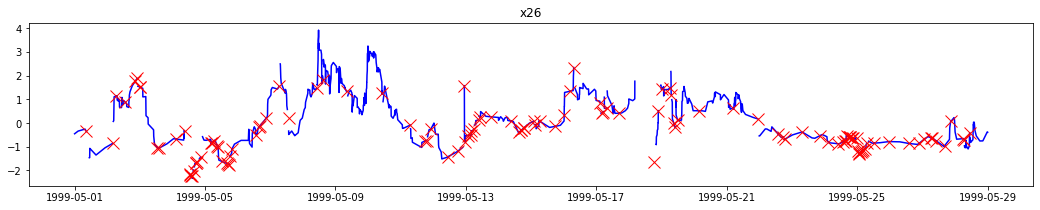

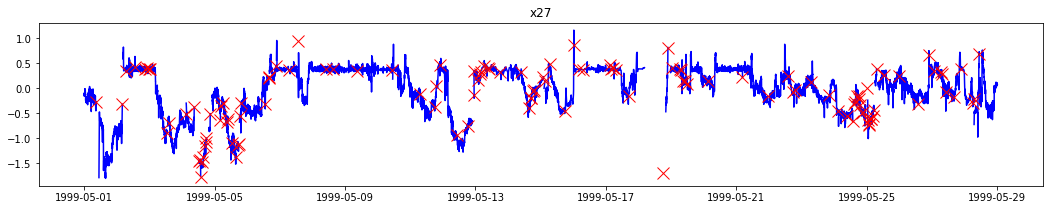

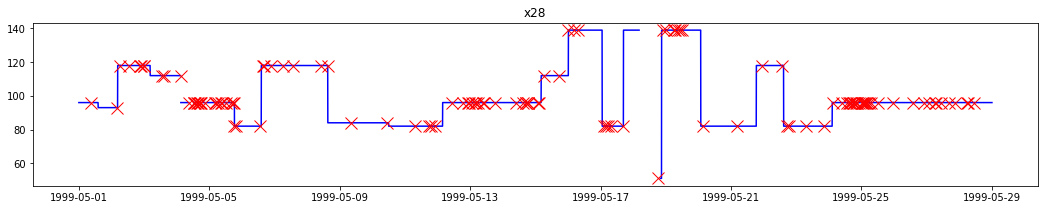

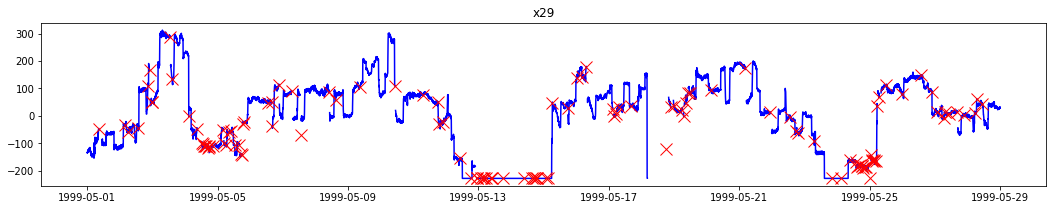

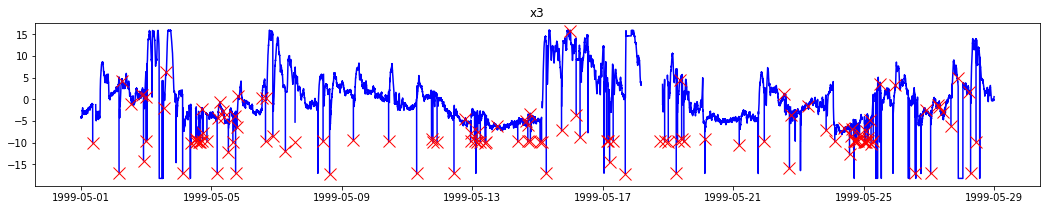

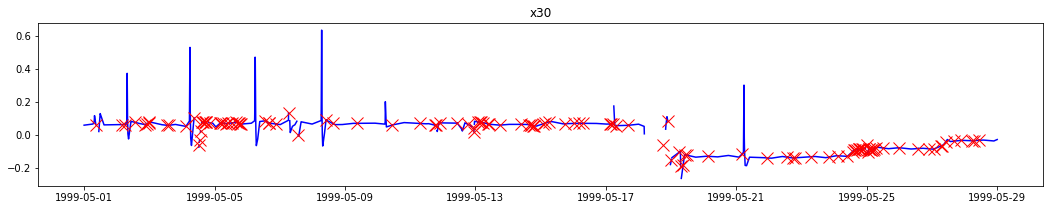

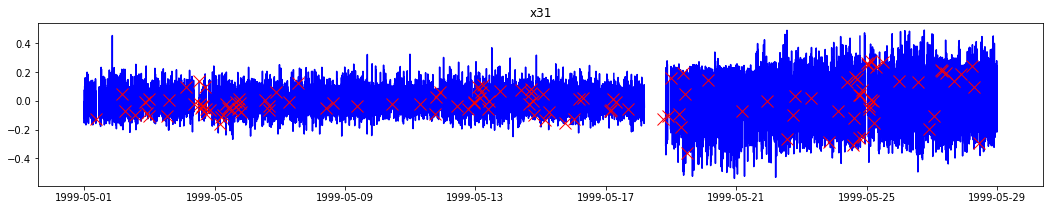

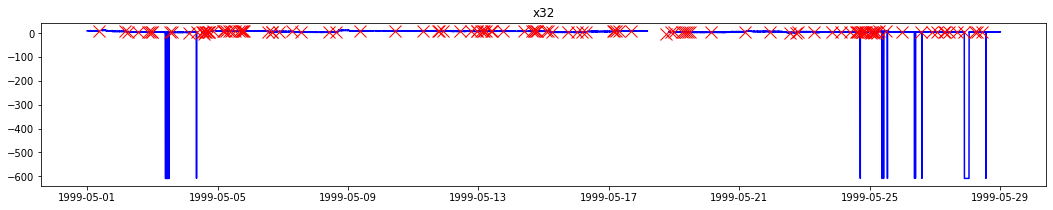

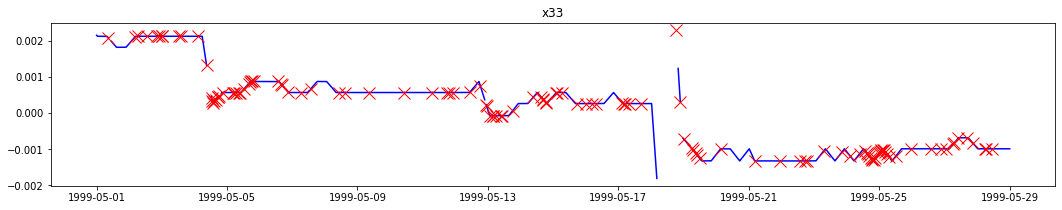

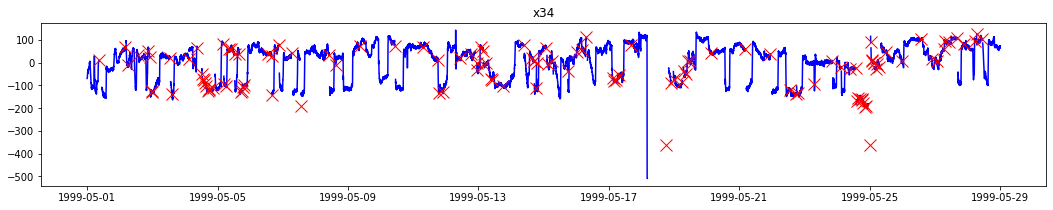

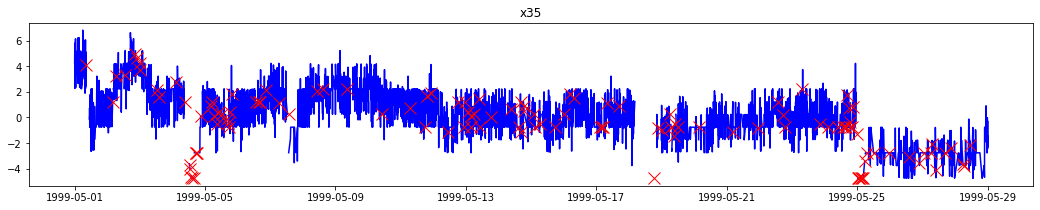

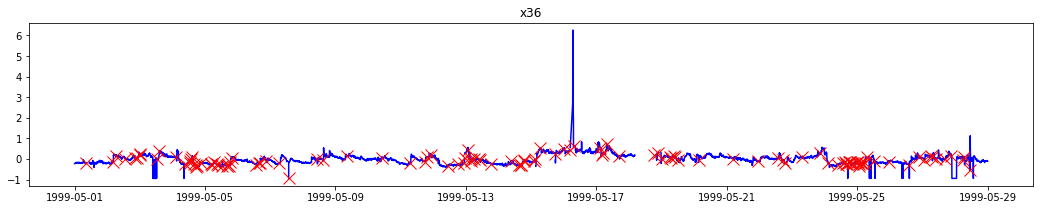

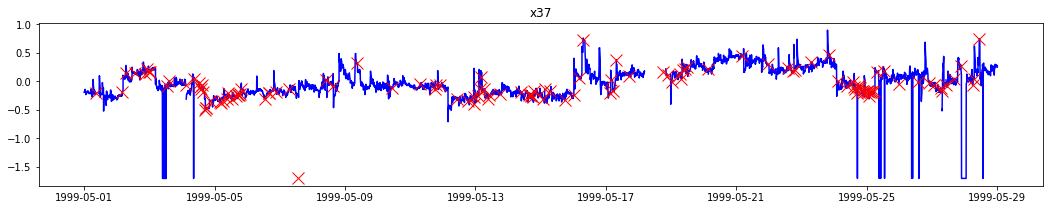

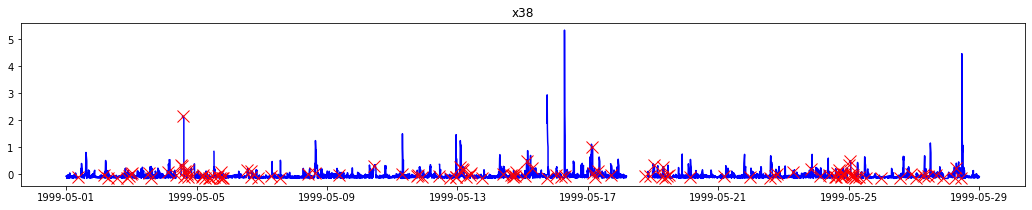

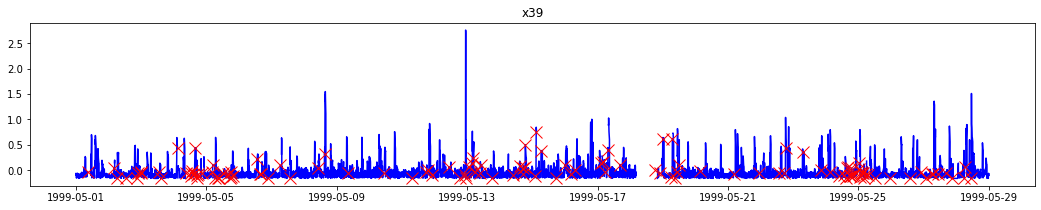

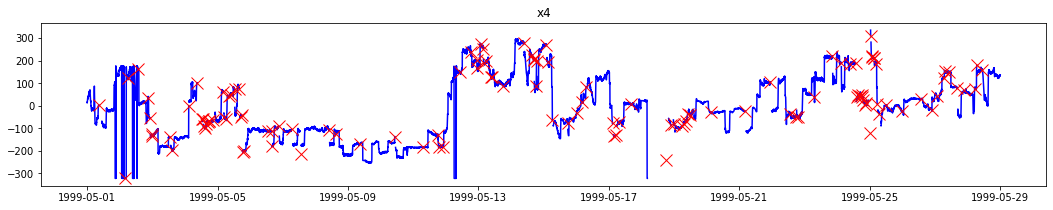

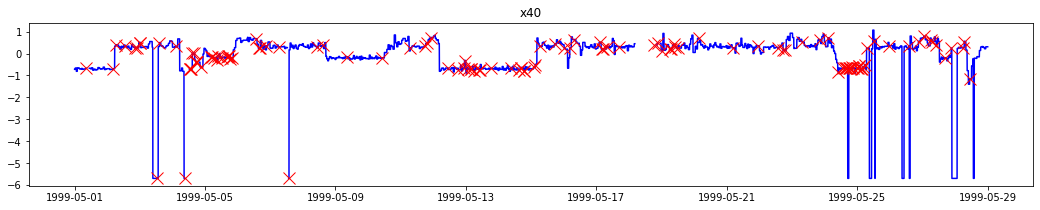

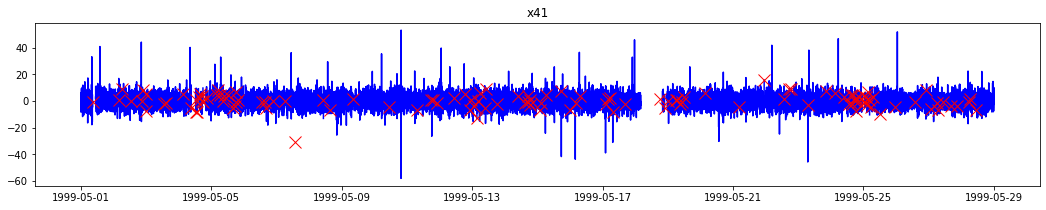

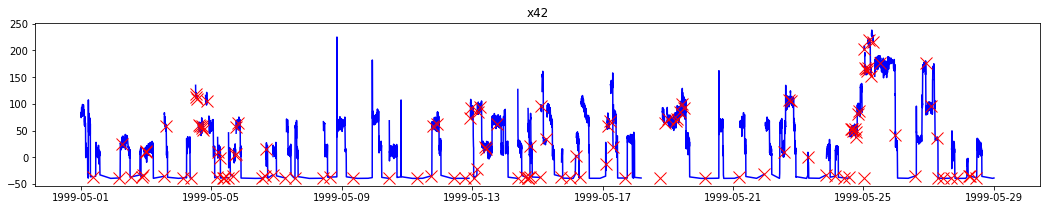

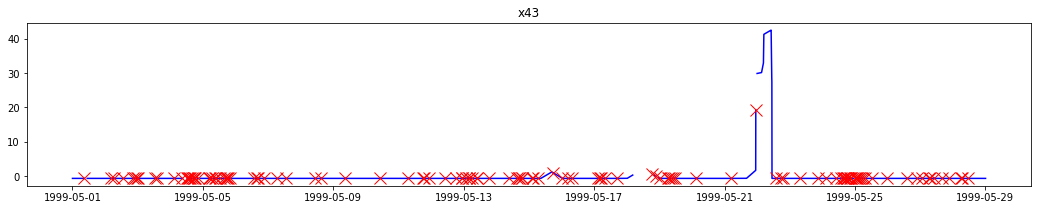

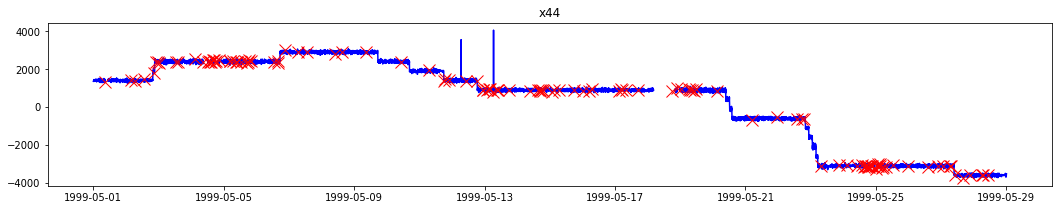

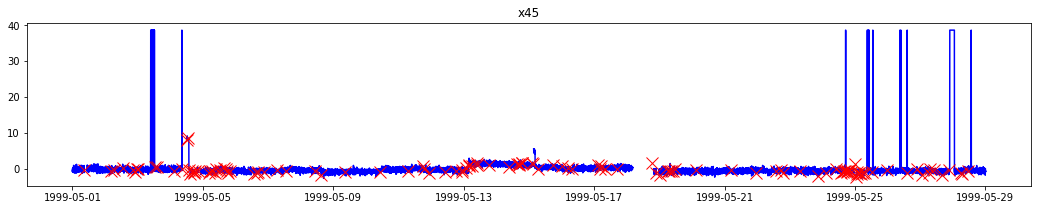

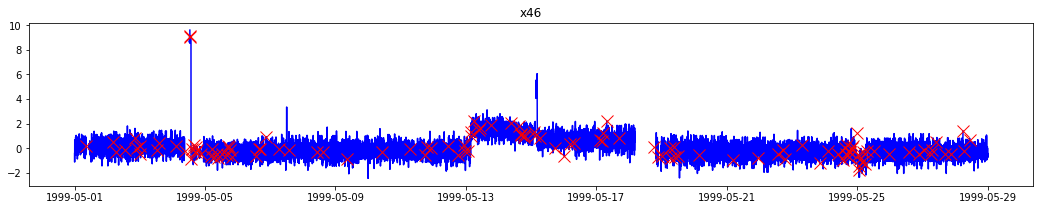

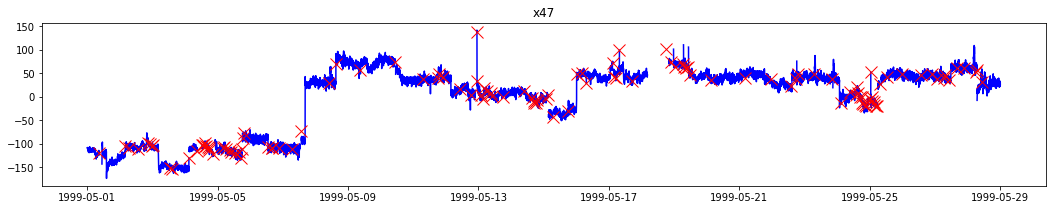

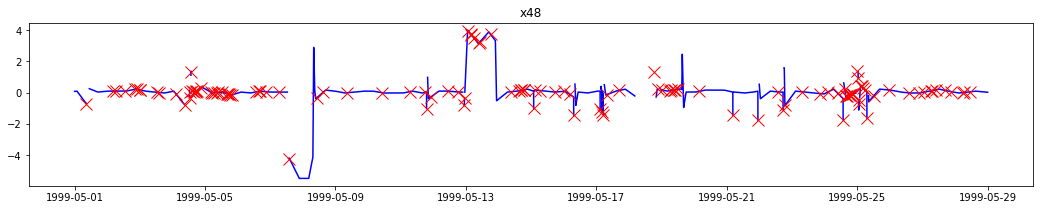

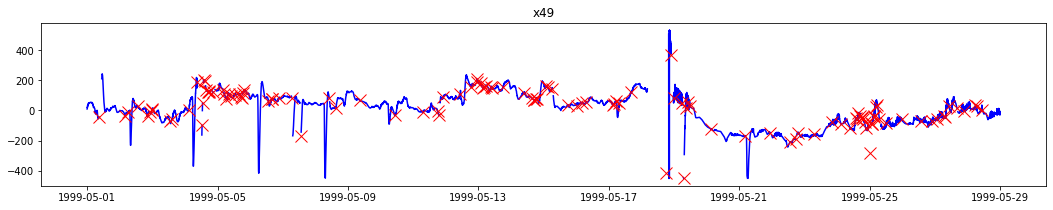

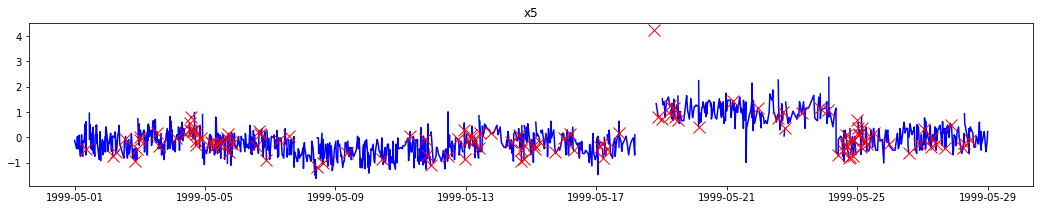

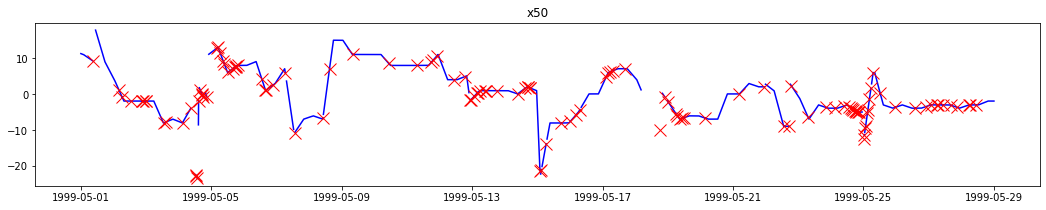

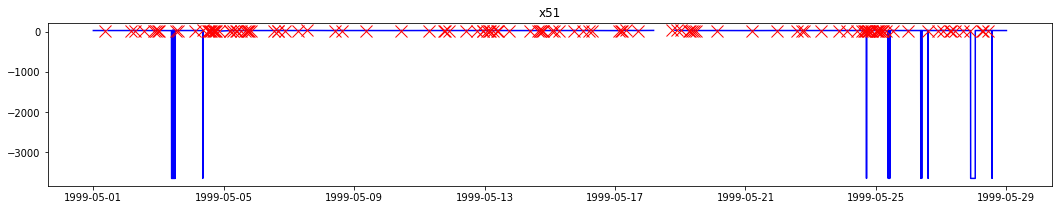

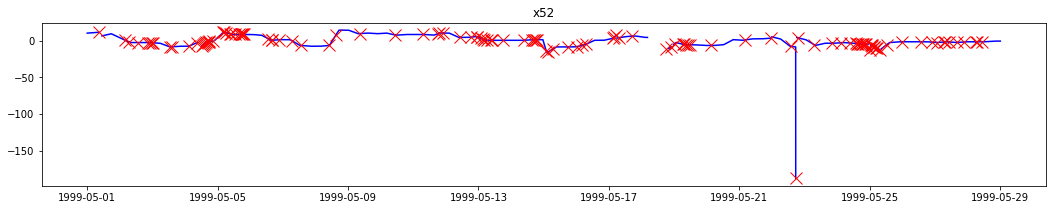

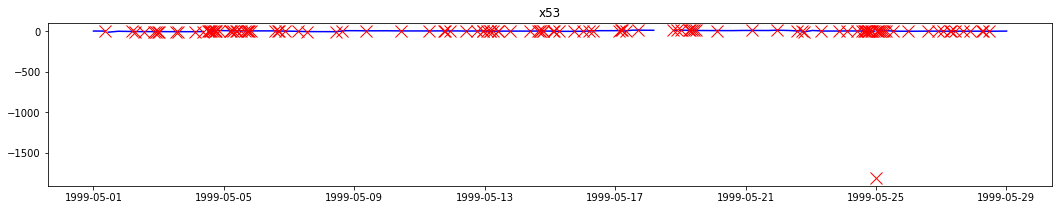

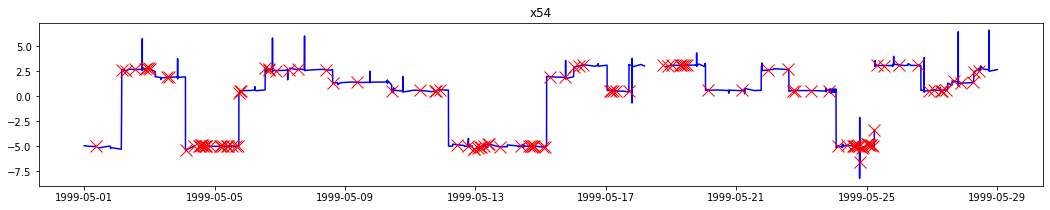

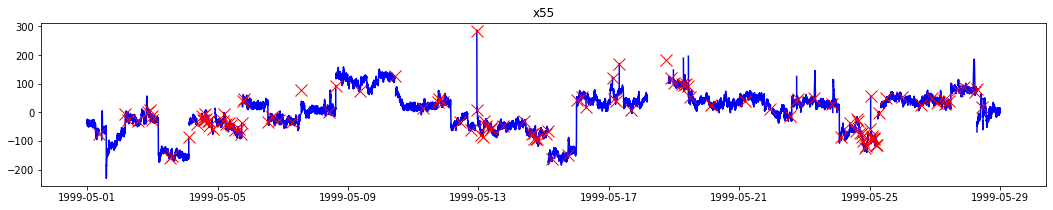

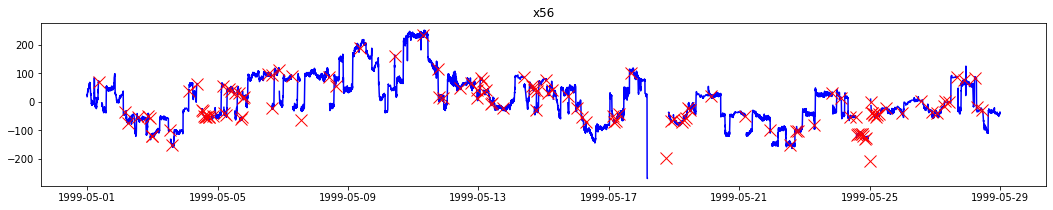

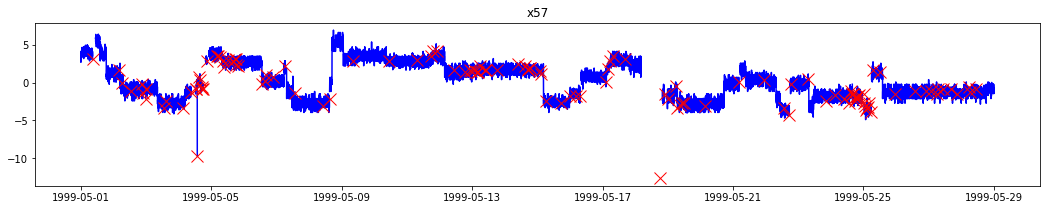

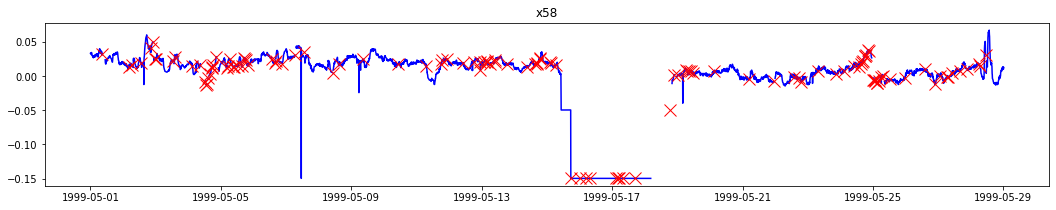

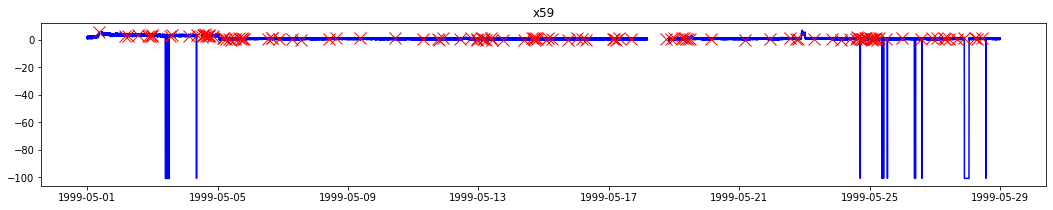

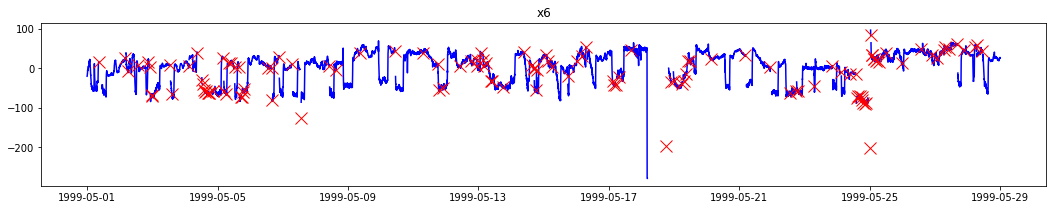

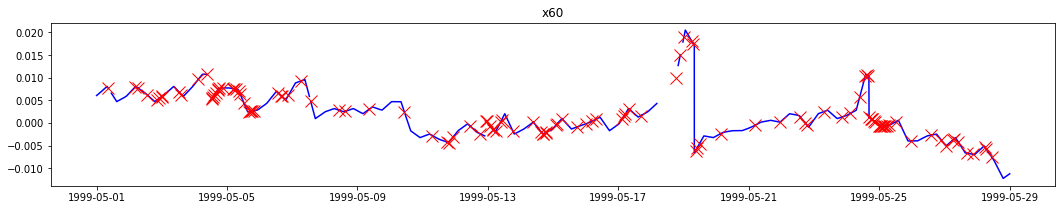

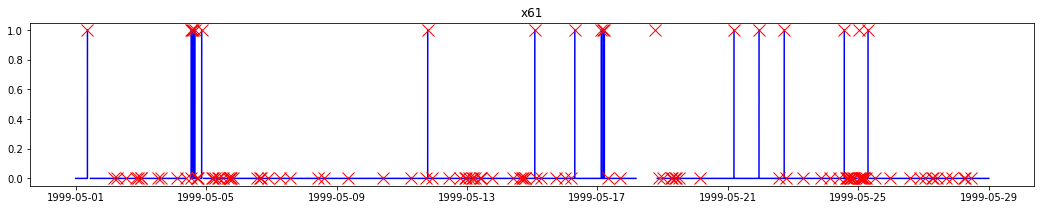

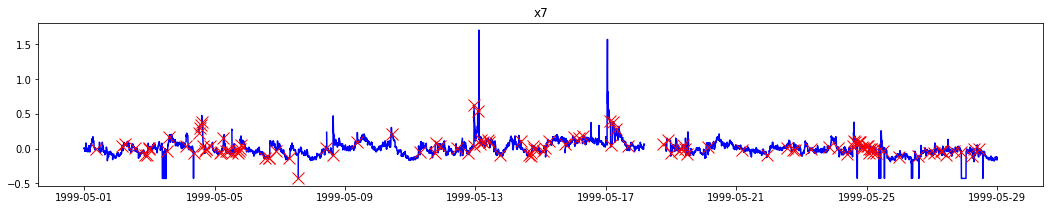

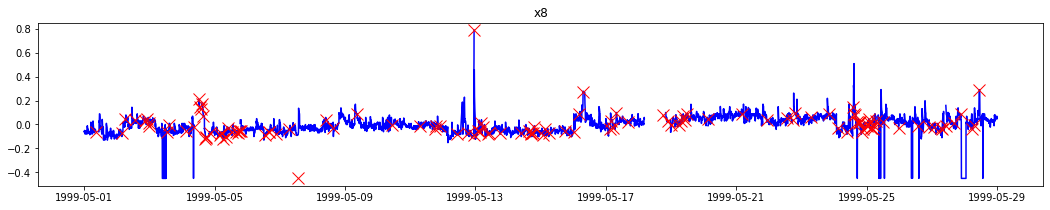

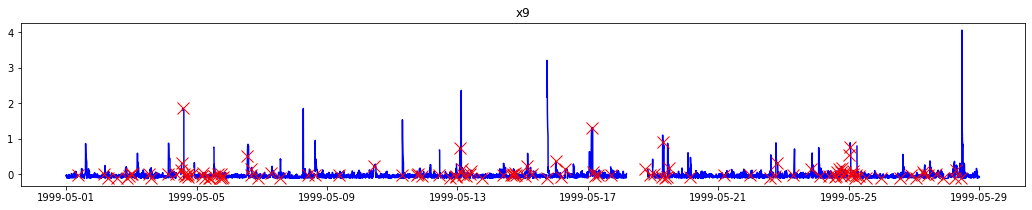

In [15]:
for sensorname in getSensorColnames():
    _data_err = df_data_new[df_data_new['y']==1][sensorname]
    
    plt.figure(figsize=FIGSIZE_SENSOR)
    plt.plot(df_data_new[sensorname], color='blue')
    plt.plot(_data_err, color='red', marker='x', linestyle='none', markersize=12)
    plt.title(sensorname)

## Fill missing values

In [16]:
# (1) Apply Rolling mean
WINDOW = 2*5 # 10 min
df_data_new = df_data_new.fillna( df_data_new.rolling(window=WINDOW, min_periods=1).mean() )


# (2) Fill remaining values with rolling mean over 1 day
df_data_new = df_data_new.fillna( df_data_new.rolling(window=2*30*24, min_periods=1).mean() )
# df_data_new = df_data_new.fillna(df_data_new.mean())
# df_data_new = df_data_new.fillna(df_data_new.interpolate())

In [17]:
# (3) Correct 'y' since they must be 0 or 1
# Fill all null values as 0
df_data_new['y'] = [(0 if np.isnan(v) else v) for v in y_reindexed]

df_data_new['y'].value_counts()

0.0    20040
1.0      124
Name: y, dtype: int64

/home/gagan/PythonEnv/env_deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


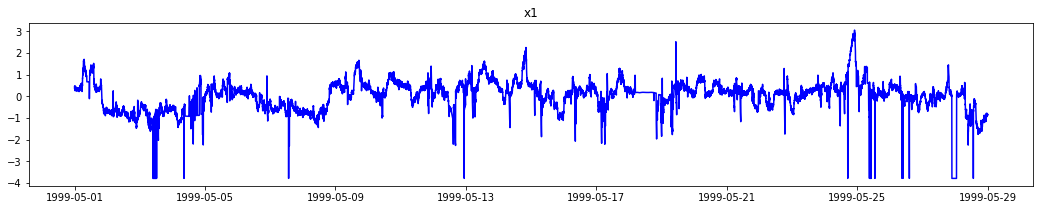

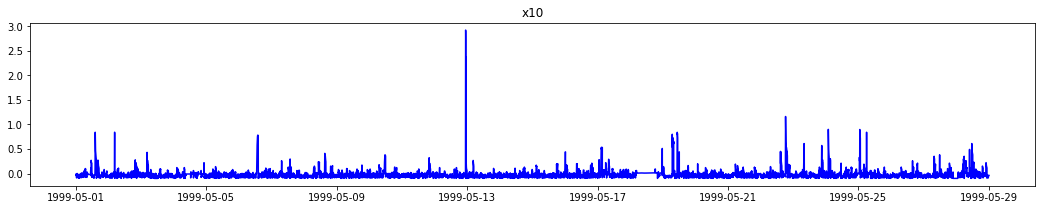

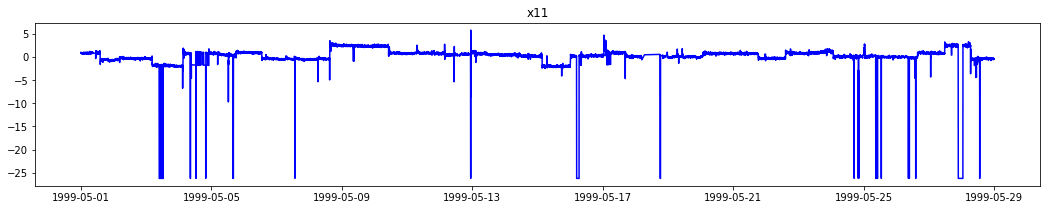

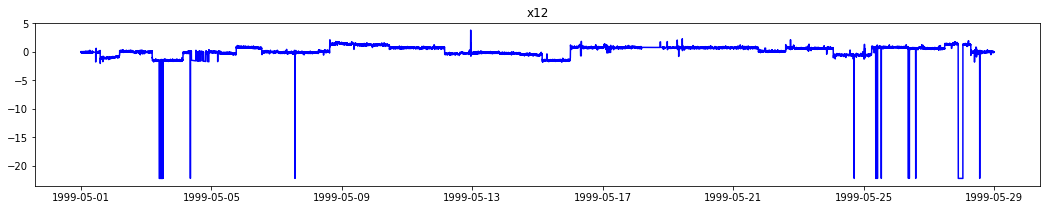

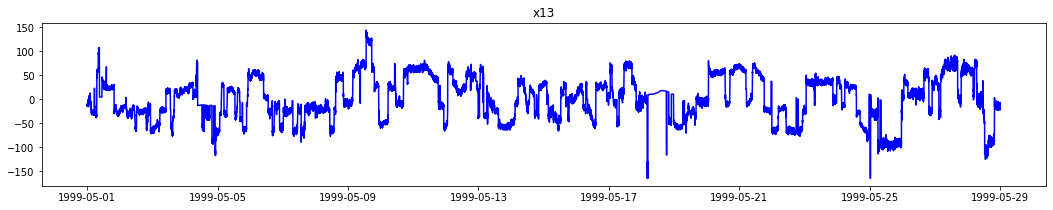

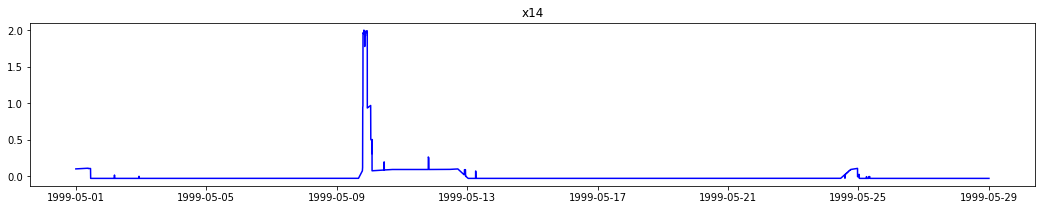

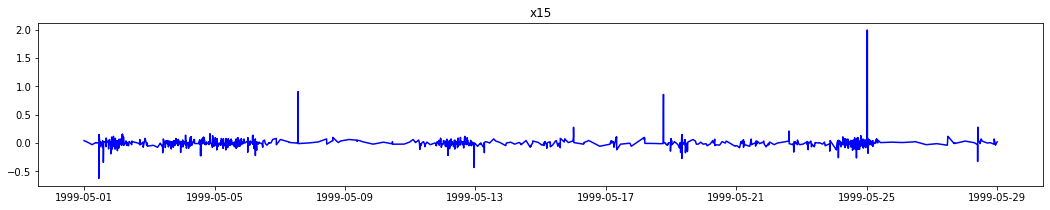

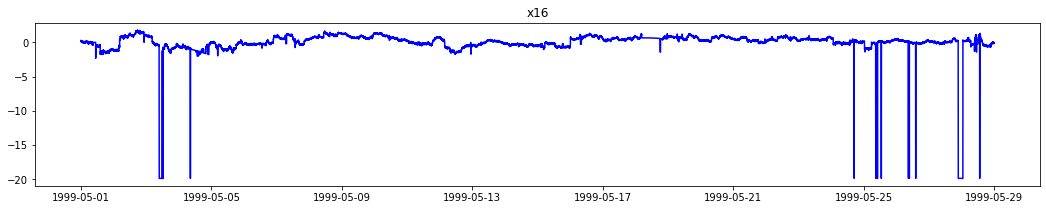

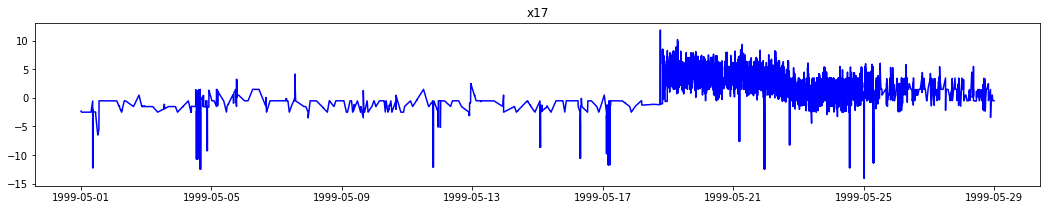

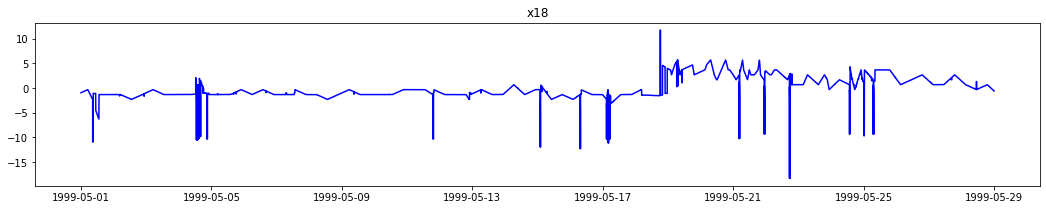

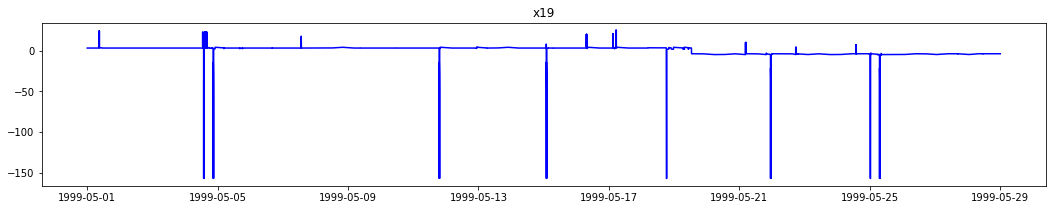

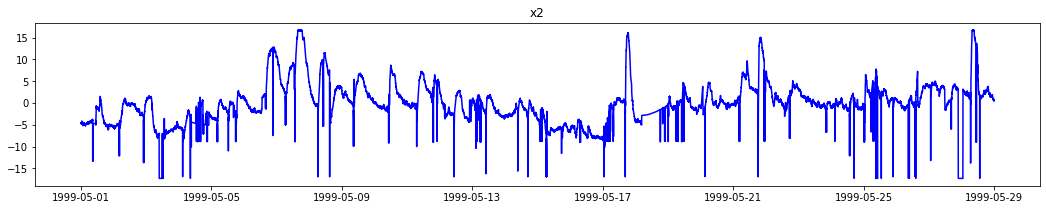

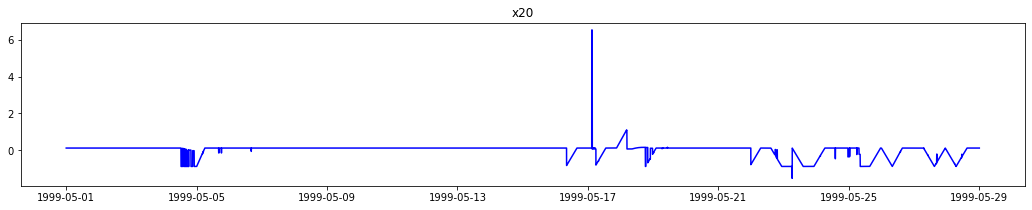

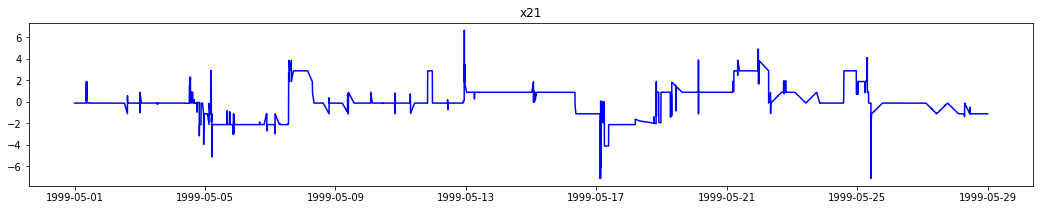

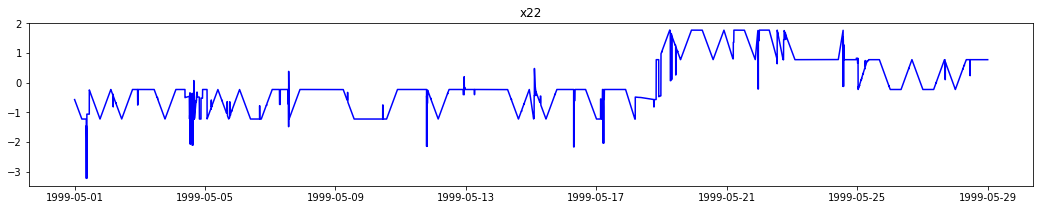

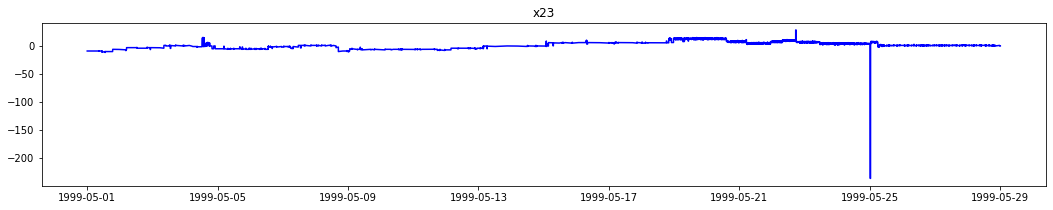

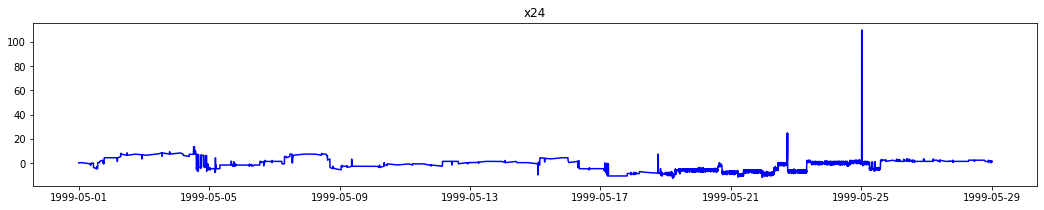

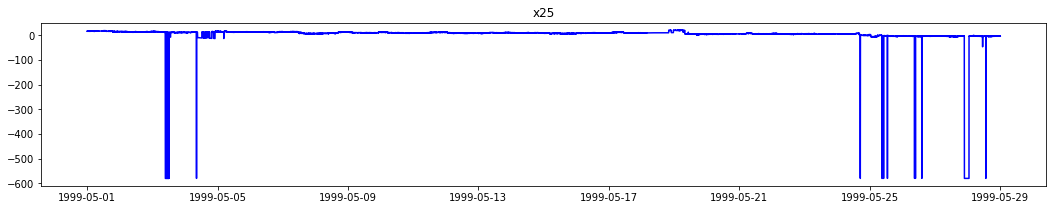

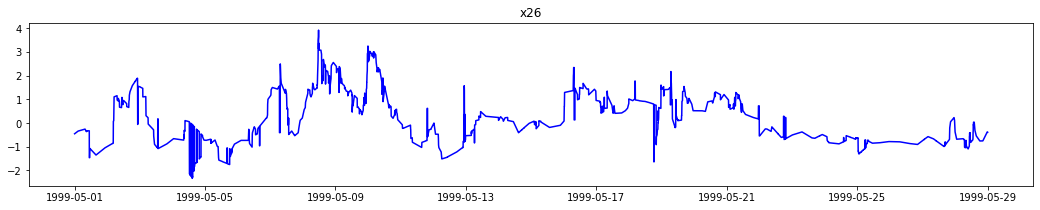

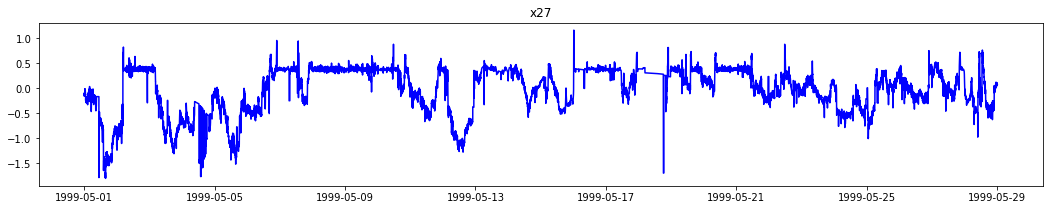

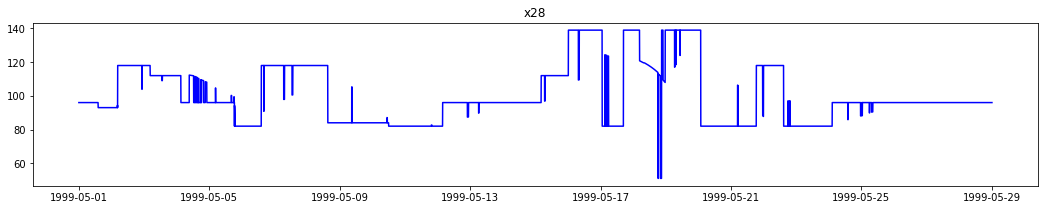

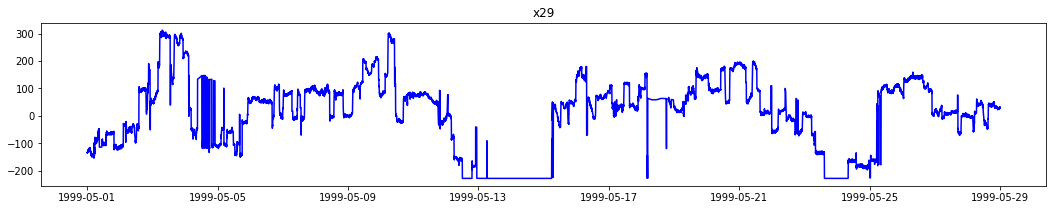

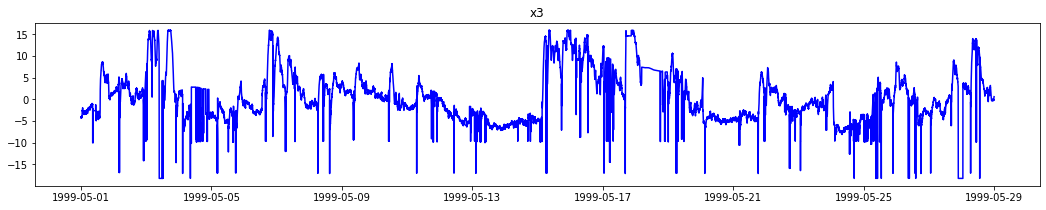

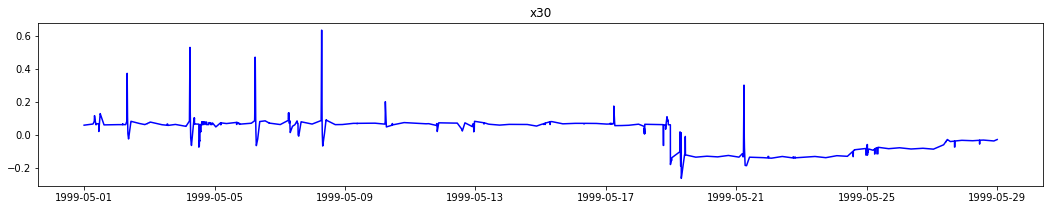

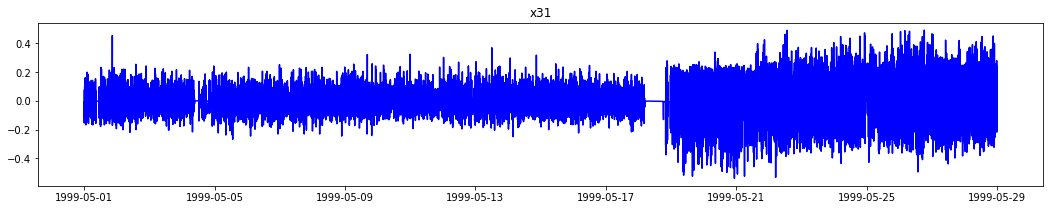

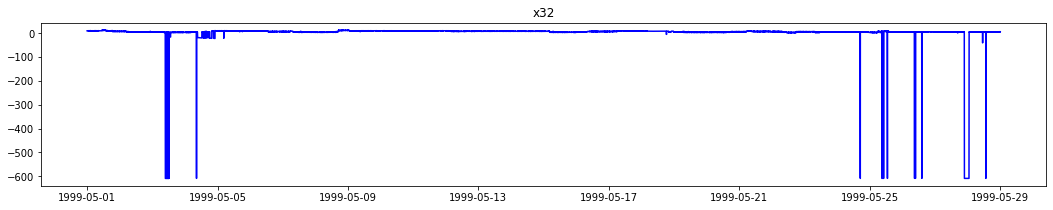

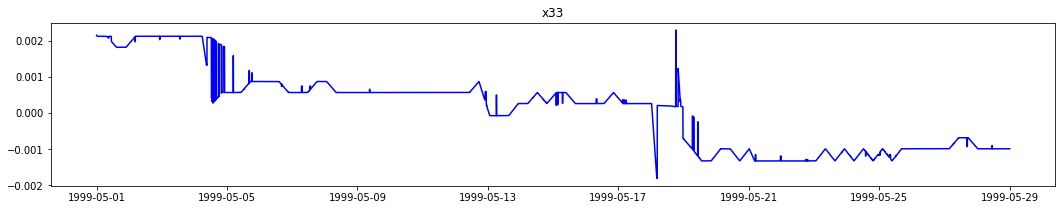

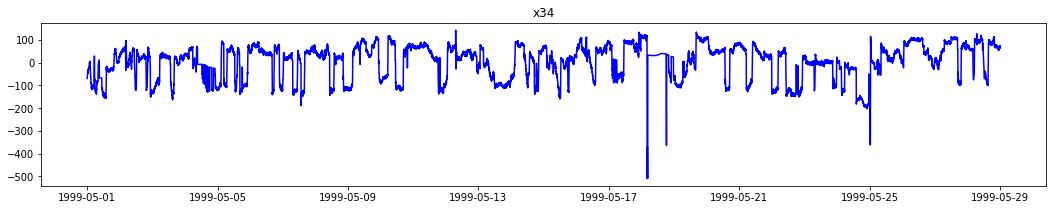

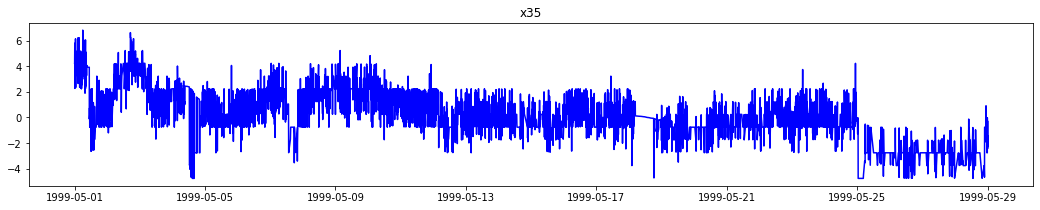

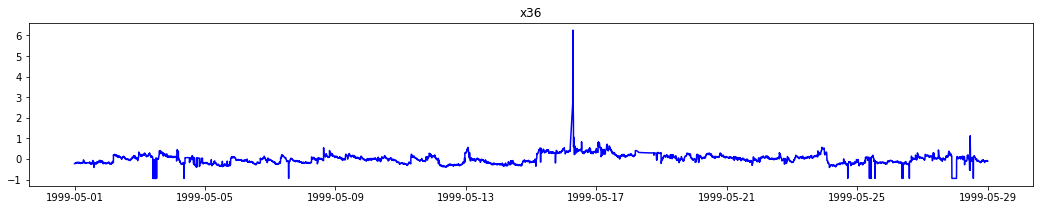

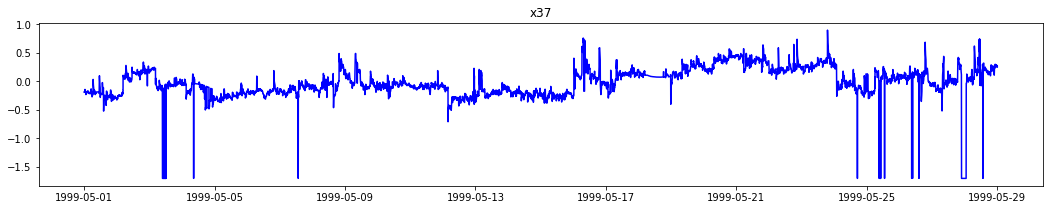

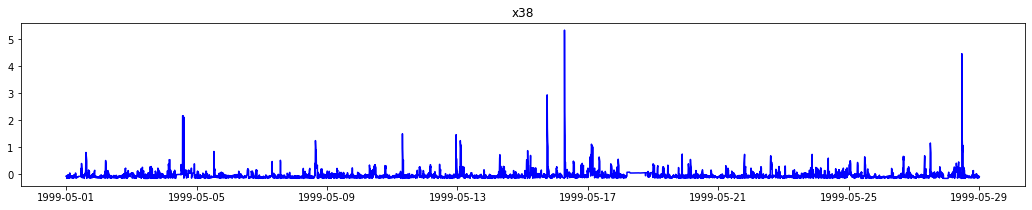

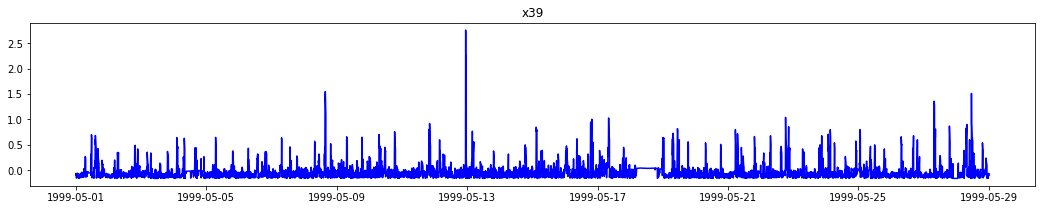

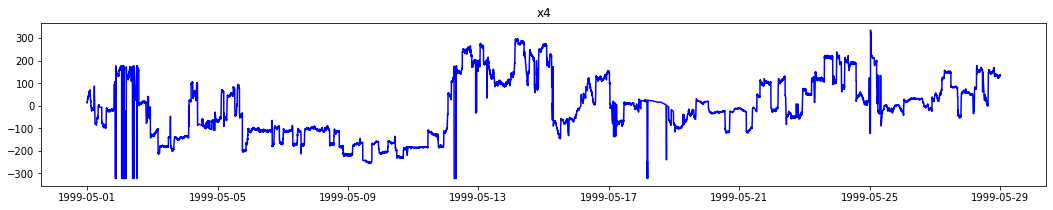

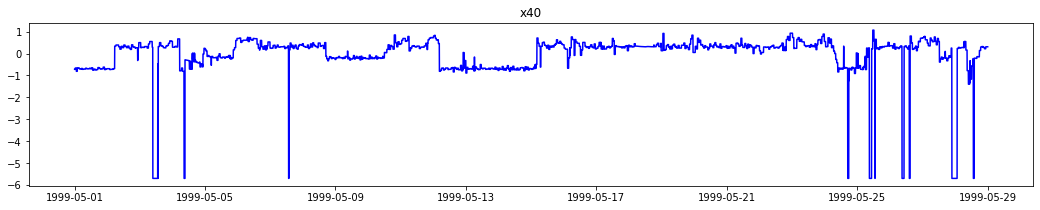

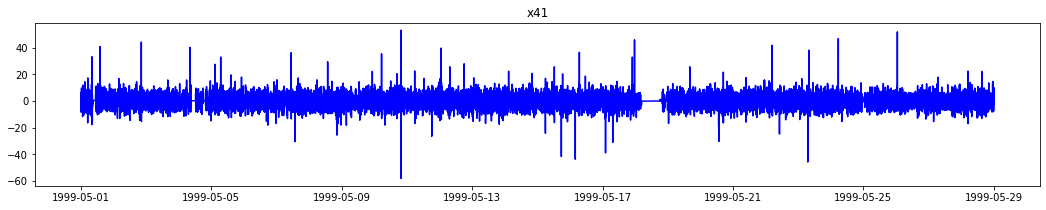

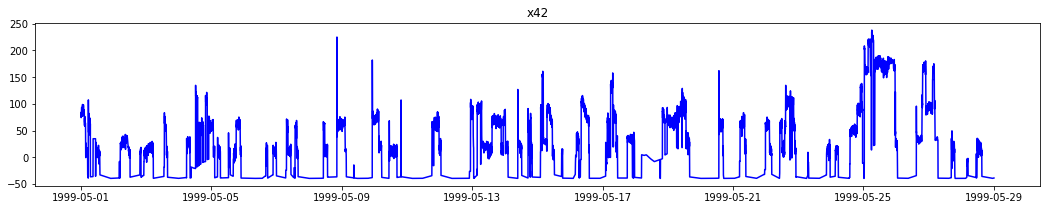

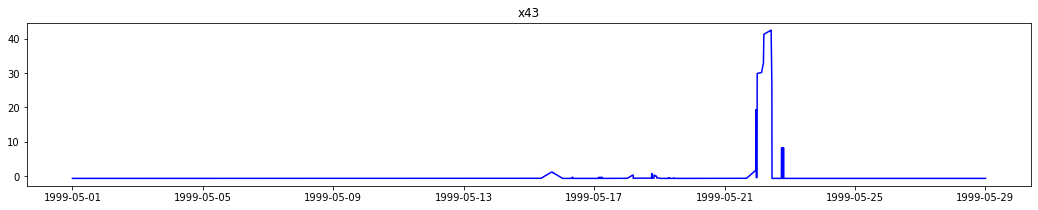

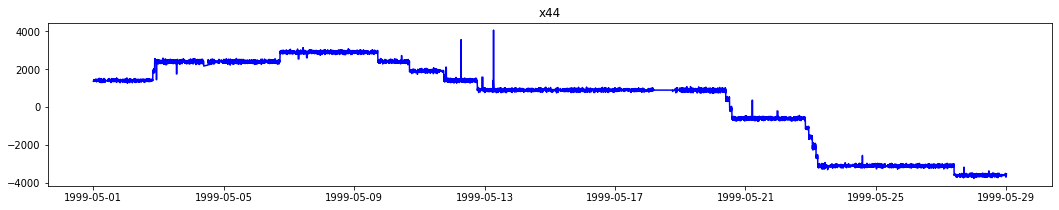

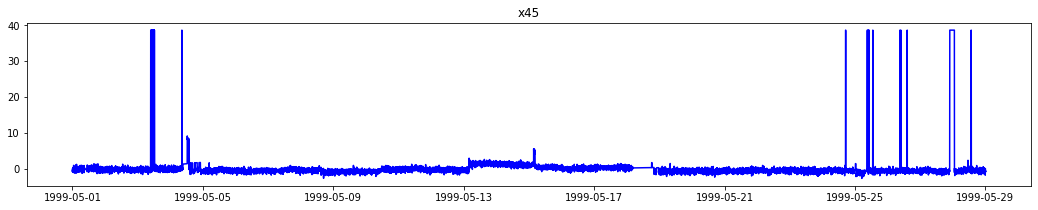

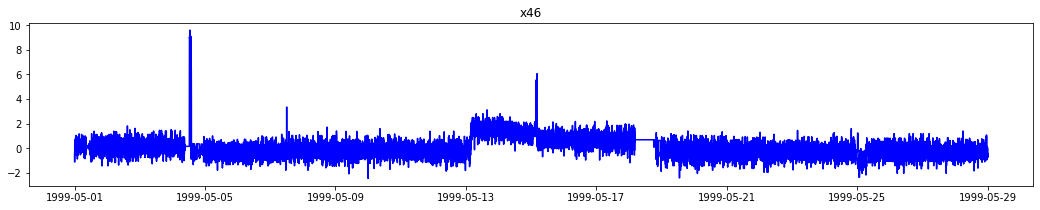

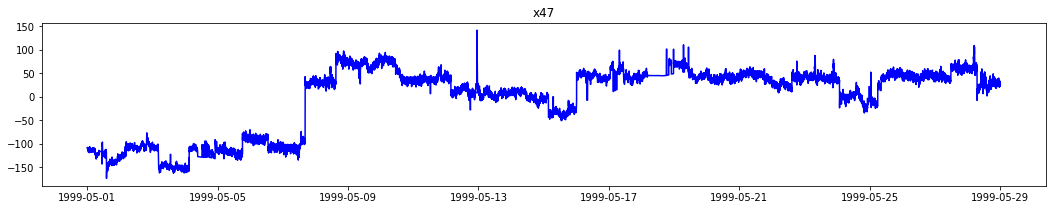

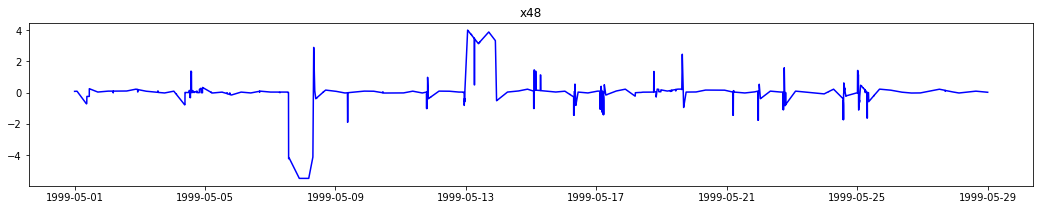

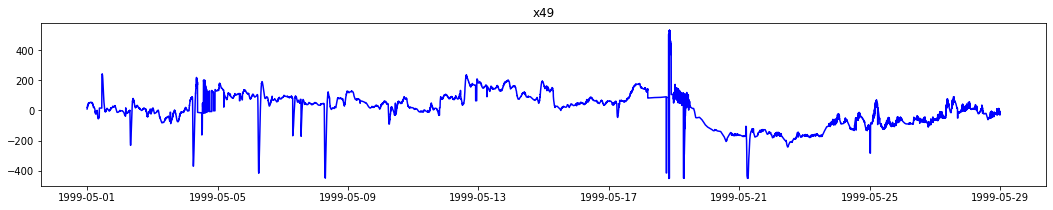

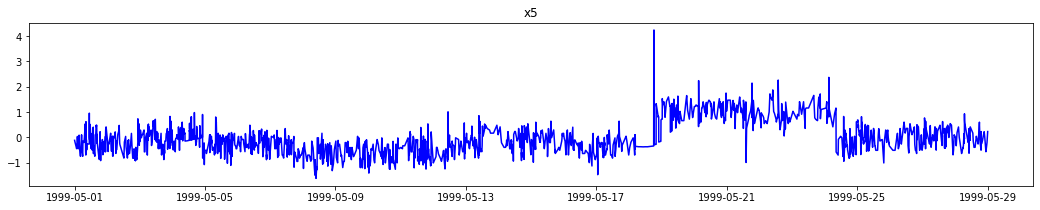

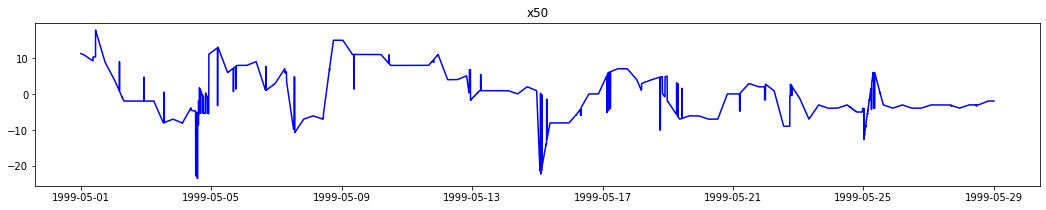

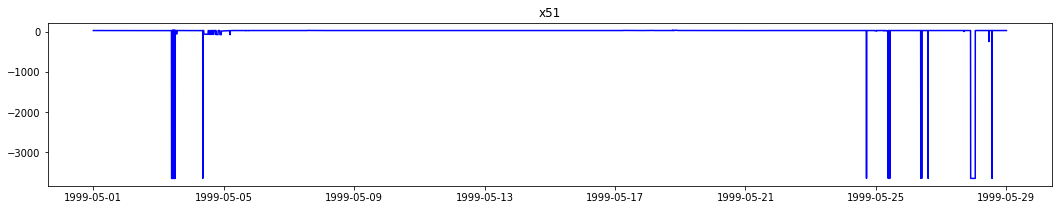

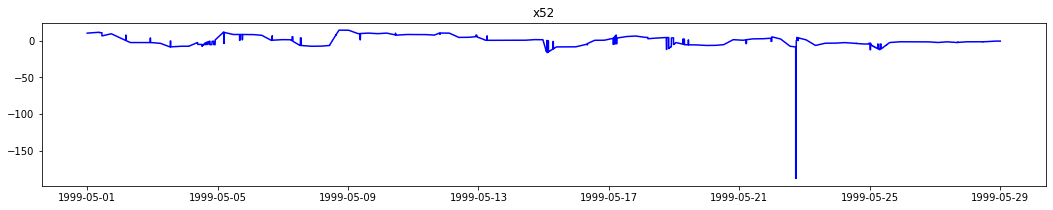

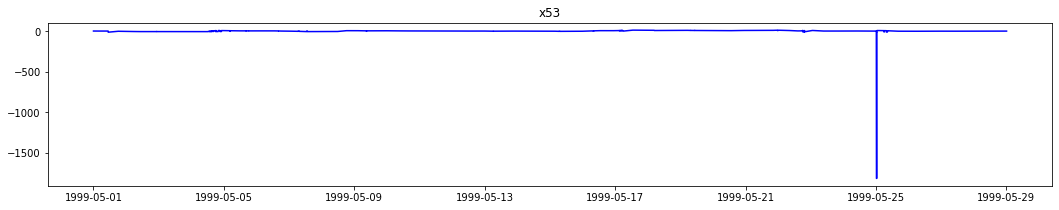

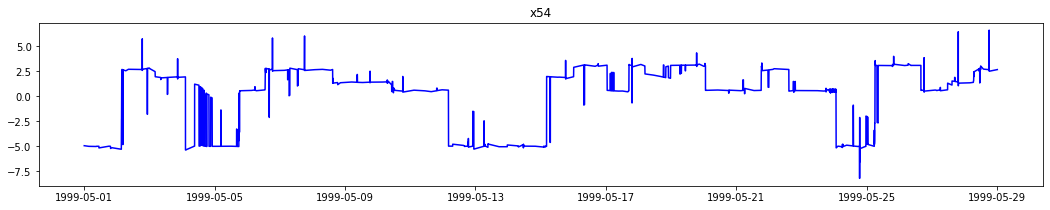

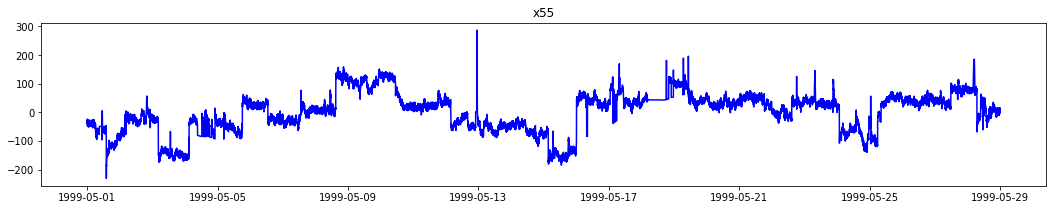

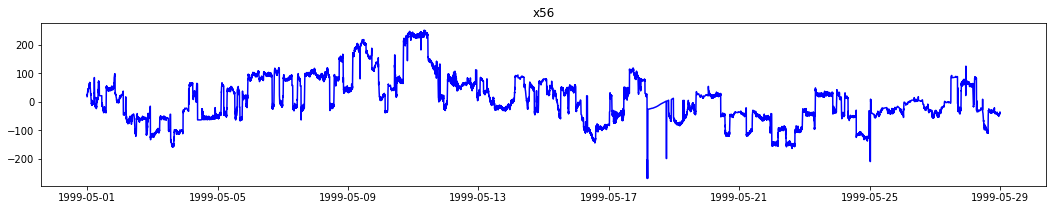

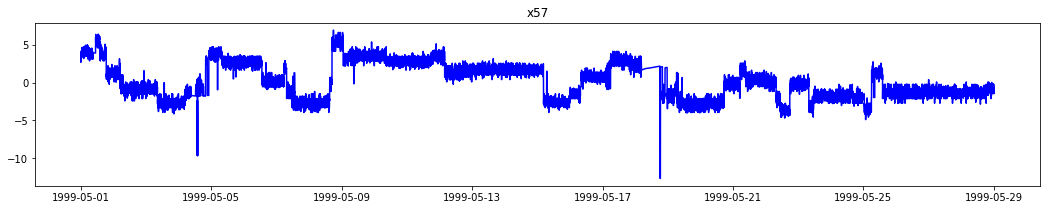

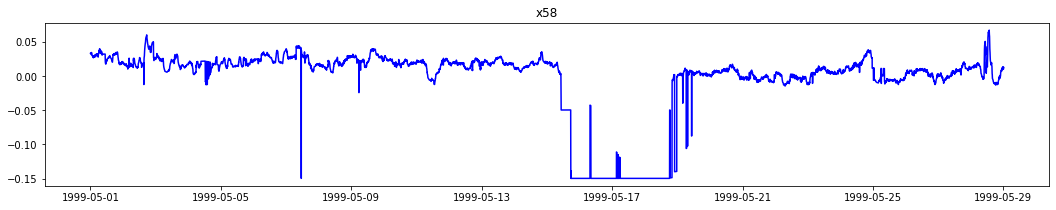

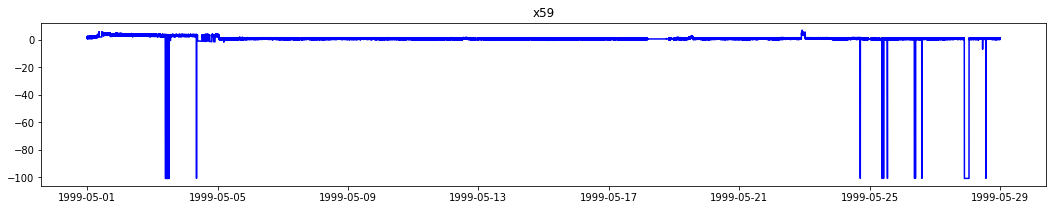

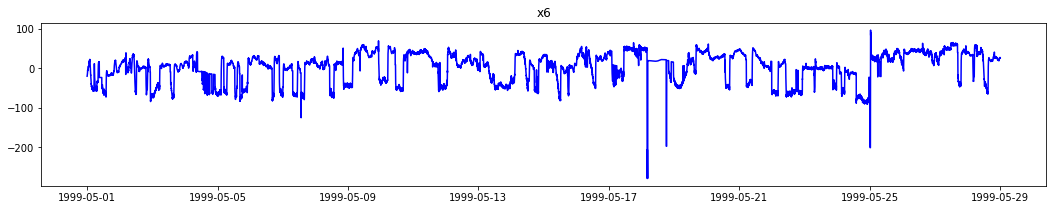

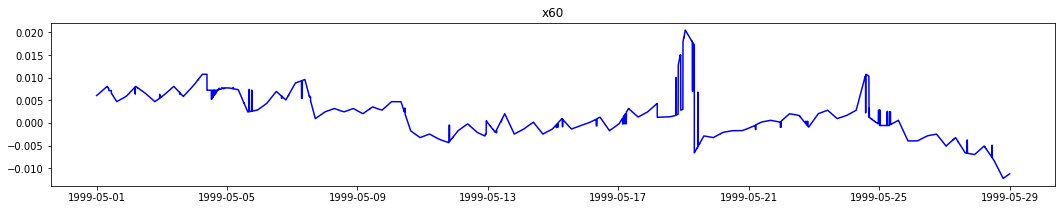

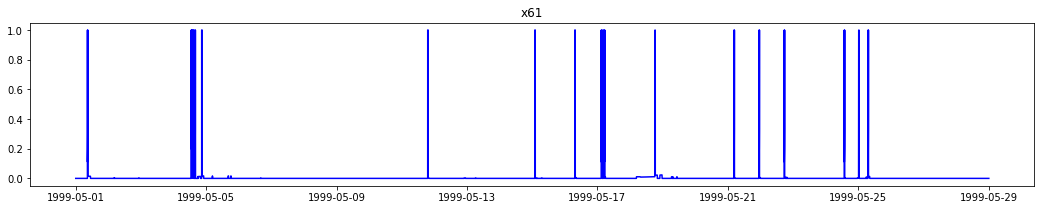

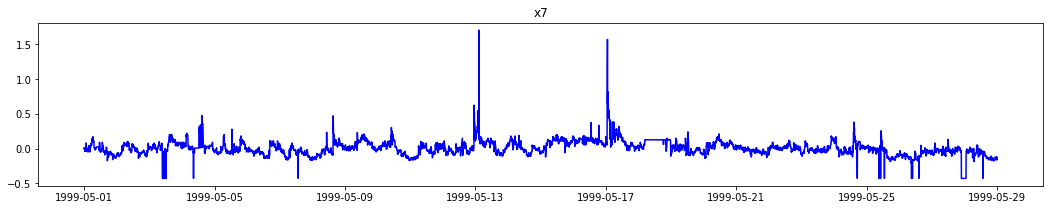

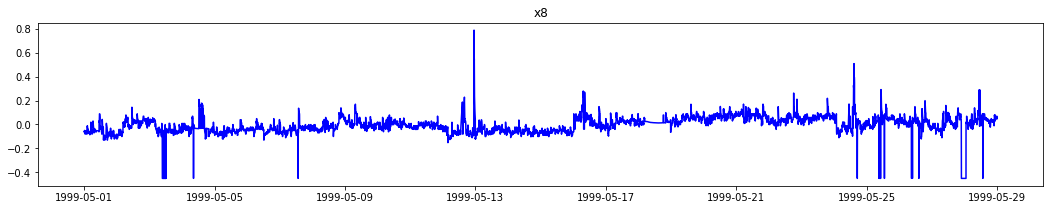

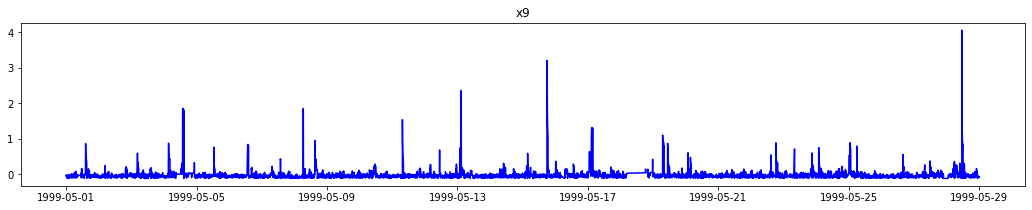

In [18]:
for sensorname in getSensorColnames():
    plt.figure(figsize=FIGSIZE_SENSOR)
    plt.plot(df_data_new[sensorname], color='blue')
    plt.title(sensorname)

In [19]:
df_data_new['time'] = [dt.strftime(FORMAT_DATETIME) for dt in df_data_new.index]

In [20]:
df_data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20164 entries, 1999-05-01 00:00:00 to 1999-05-29 00:06:00
Freq: 2T
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    20164 non-null  object 
 1   y       20164 non-null  float64
 2   x1      20164 non-null  float64
 3   x2      20164 non-null  float64
 4   x3      20164 non-null  float64
 5   x4      20164 non-null  float64
 6   x5      20164 non-null  float64
 7   x6      20164 non-null  float64
 8   x7      20164 non-null  float64
 9   x8      20164 non-null  float64
 10  x9      20164 non-null  float64
 11  x10     20164 non-null  float64
 12  x11     20164 non-null  float64
 13  x12     20164 non-null  float64
 14  x13     20164 non-null  float64
 15  x14     20164 non-null  float64
 16  x15     20164 non-null  float64
 17  x16     20164 non-null  float64
 18  x17     20164 non-null  float64
 19  x18     20164 non-null  float64
 20  x19     20164 non-null  floa

## Visualize Rolling mean vs Rolling std

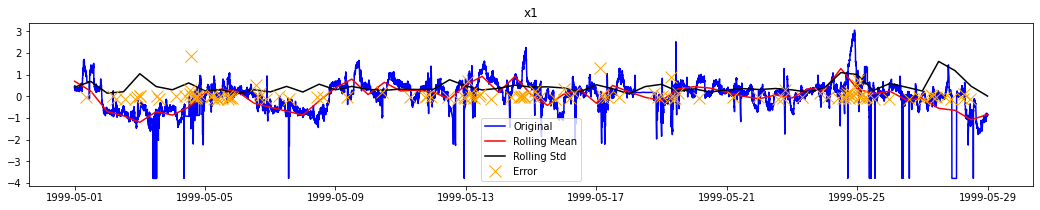

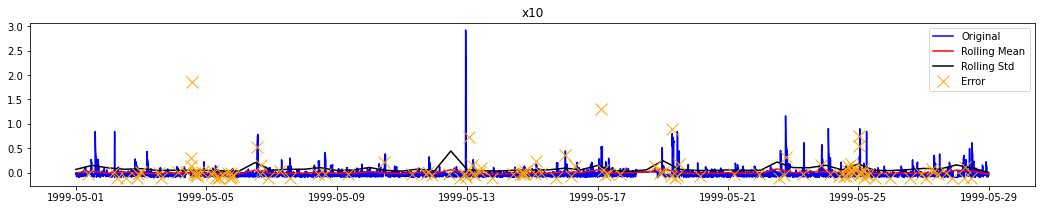

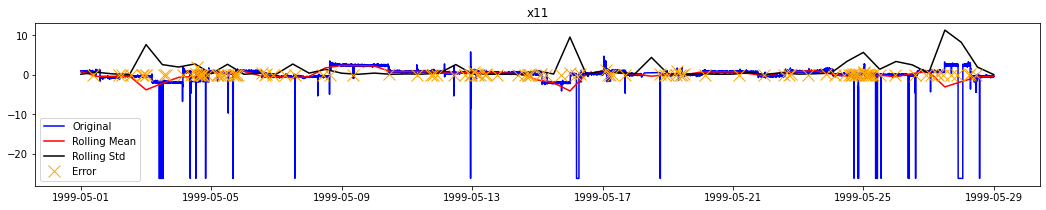

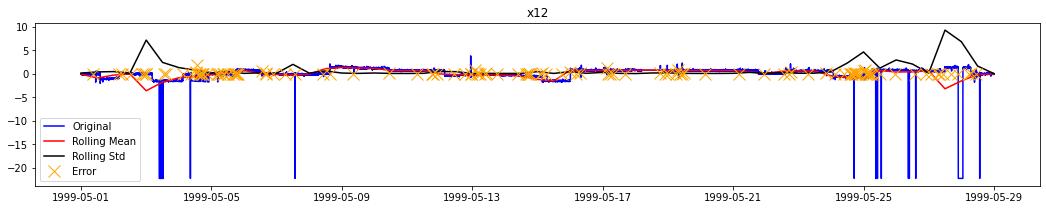

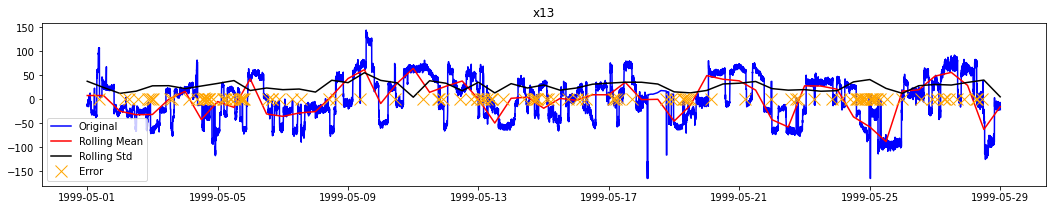

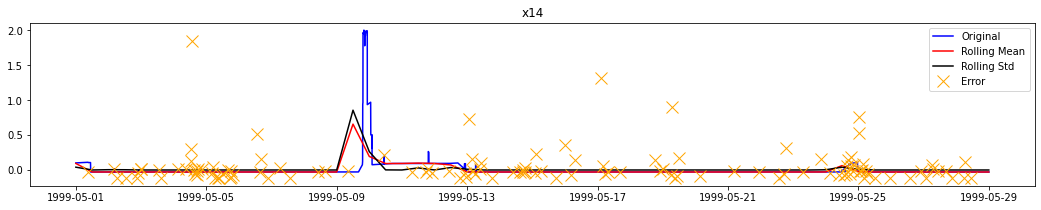

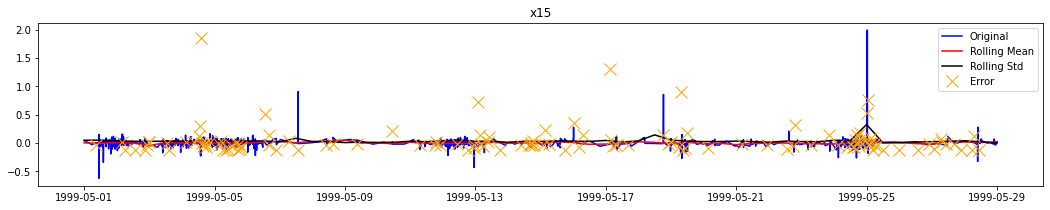

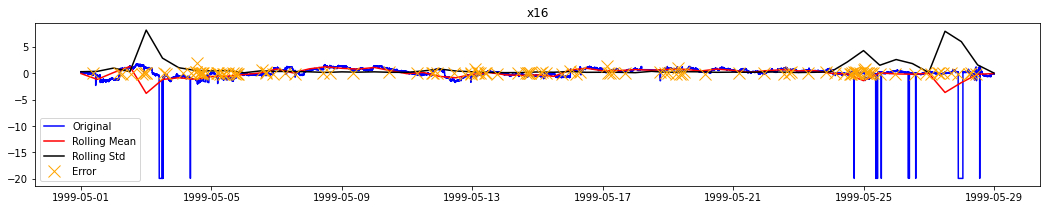

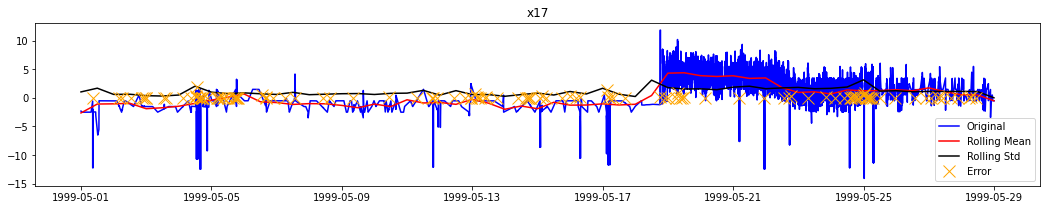

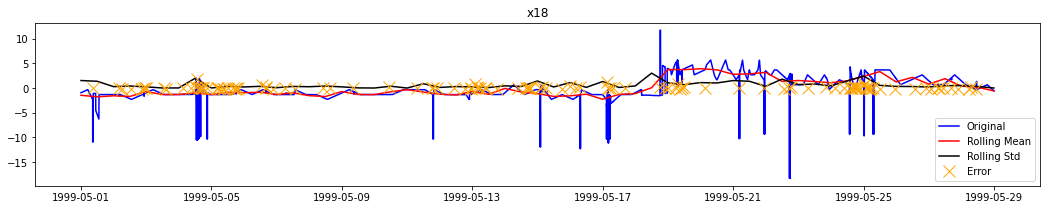

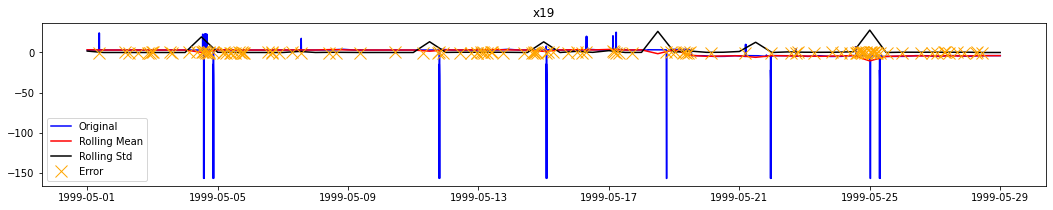

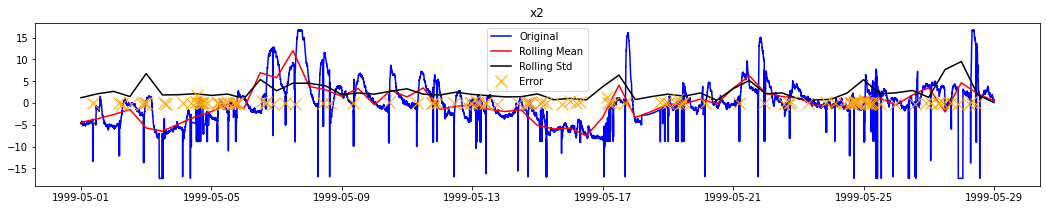

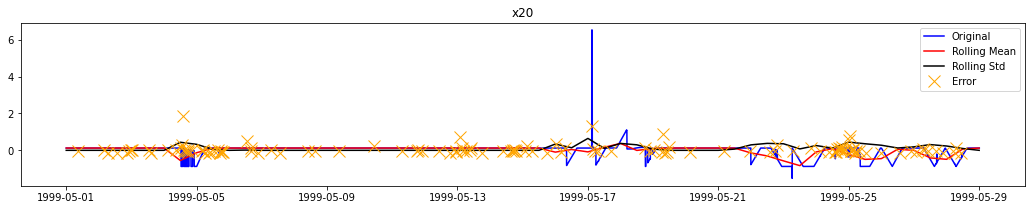

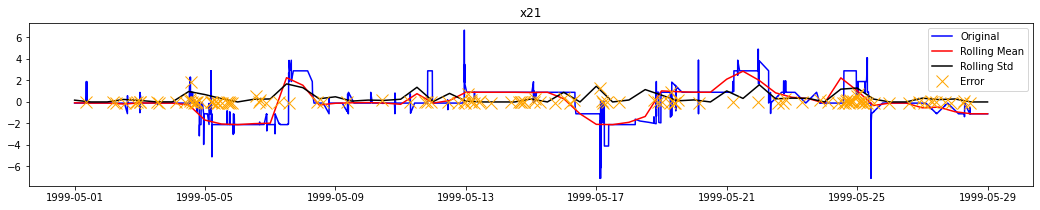

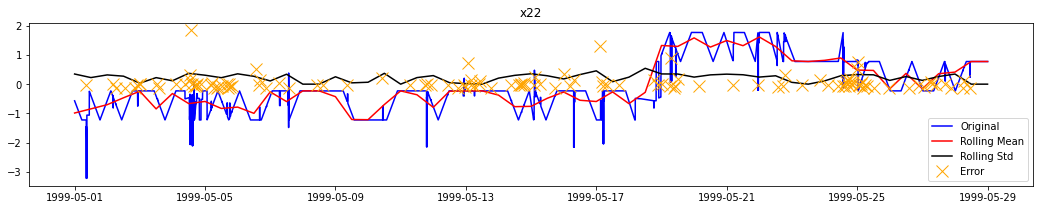

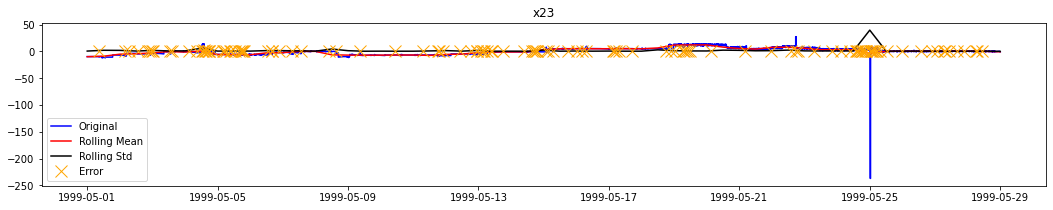

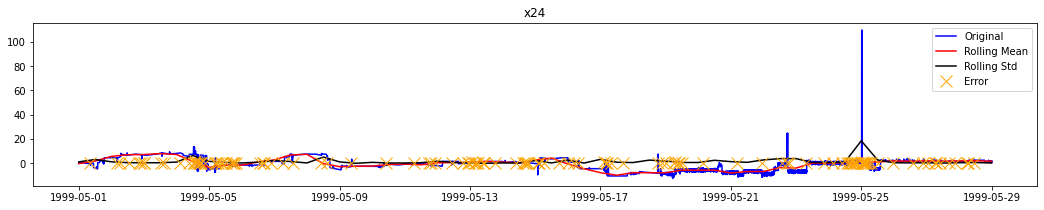

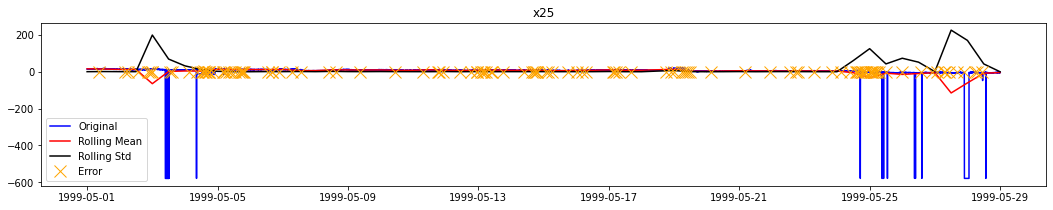

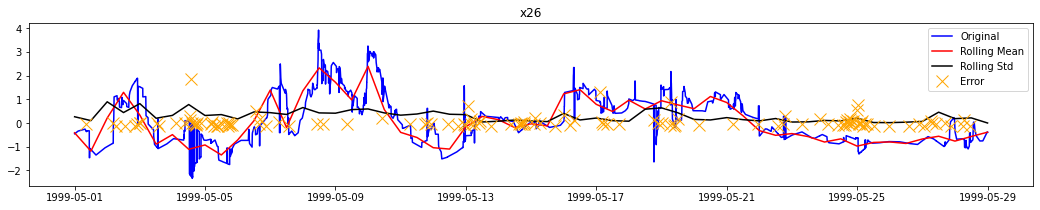

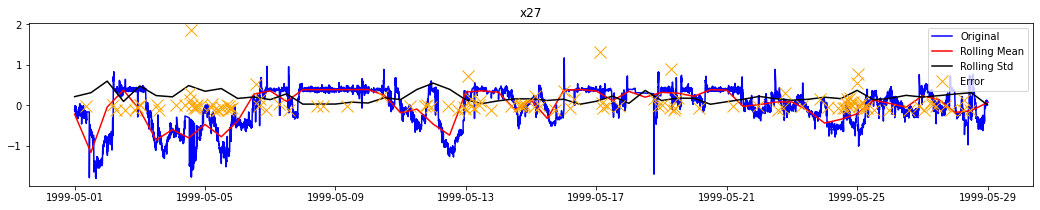

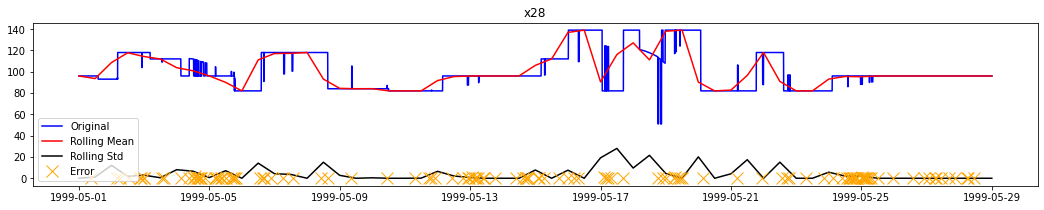

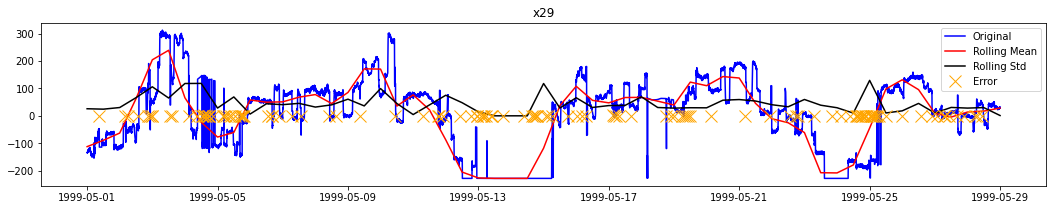

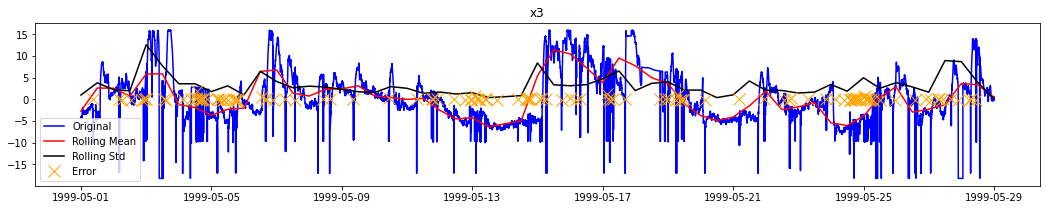

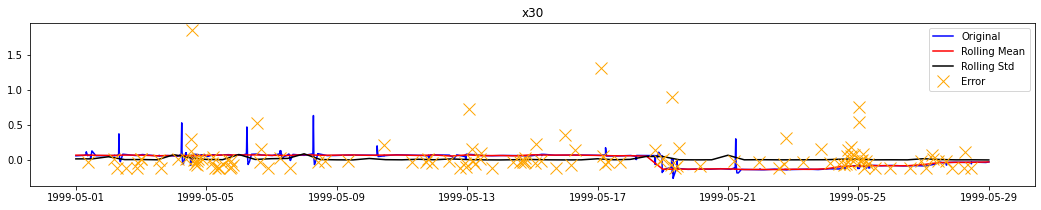

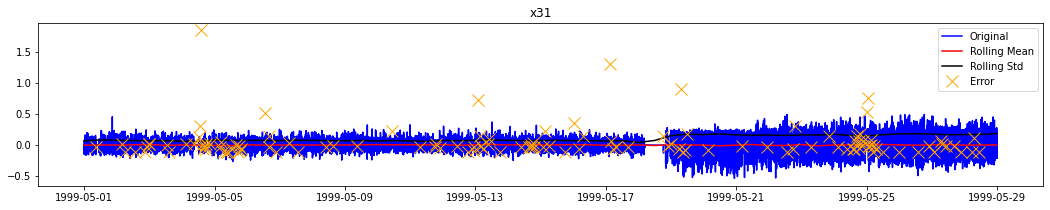

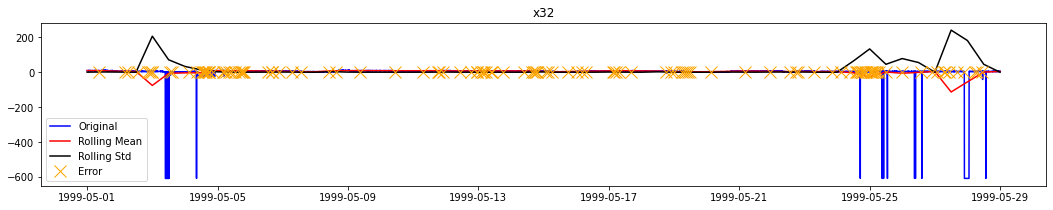

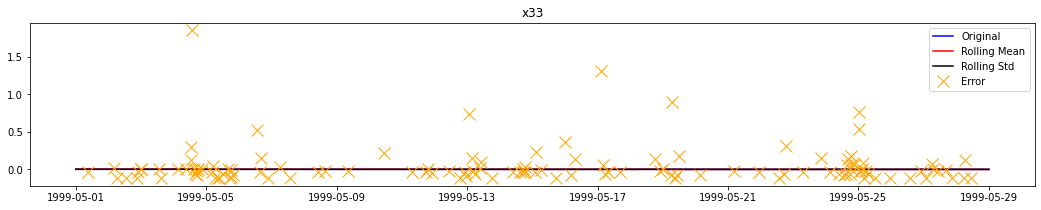

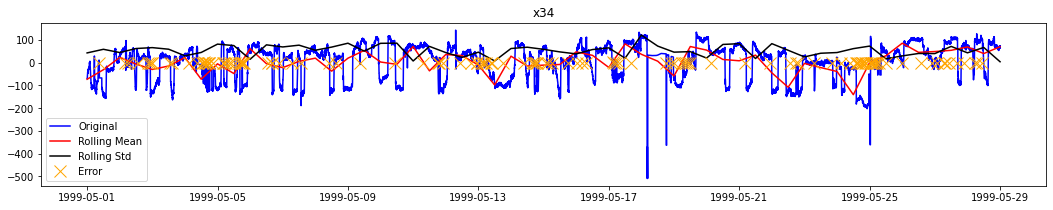

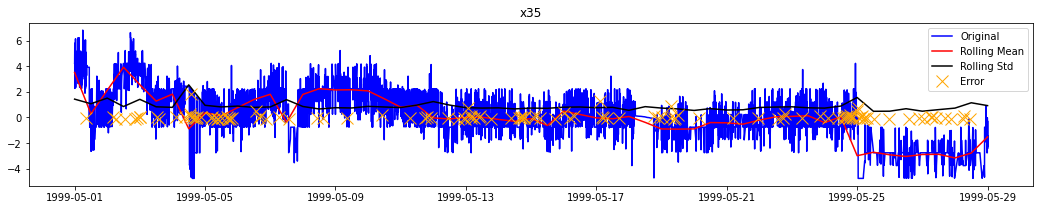

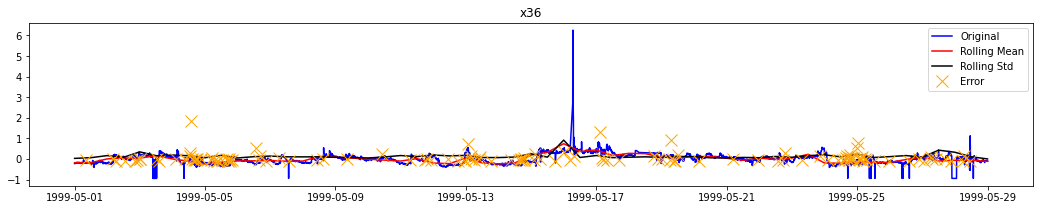

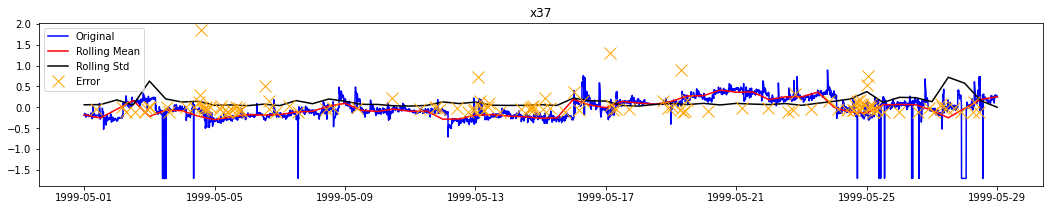

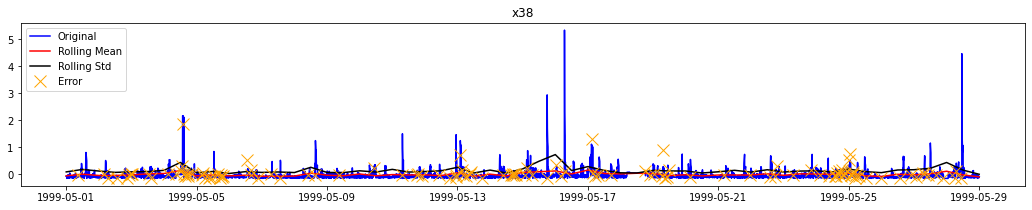

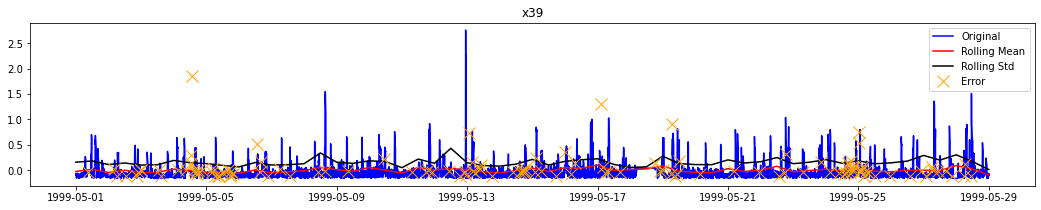

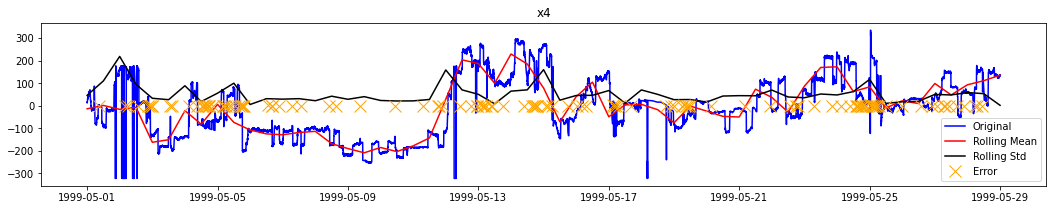

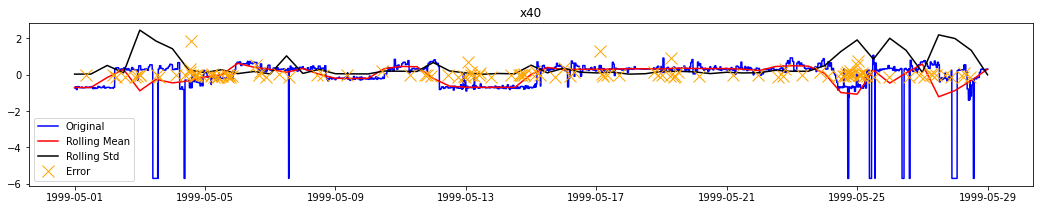

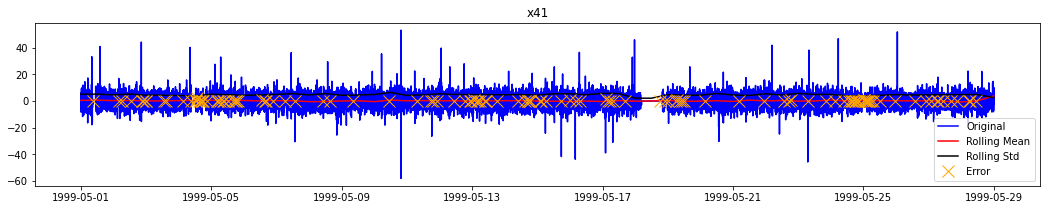

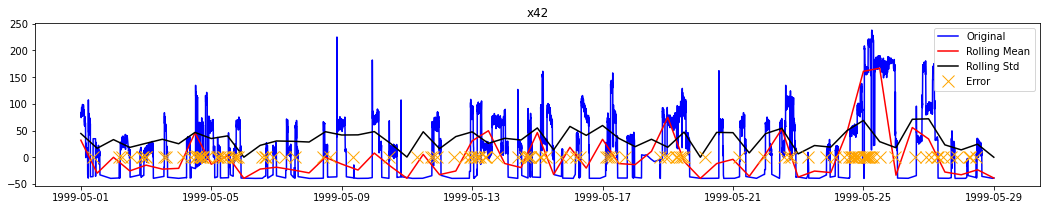

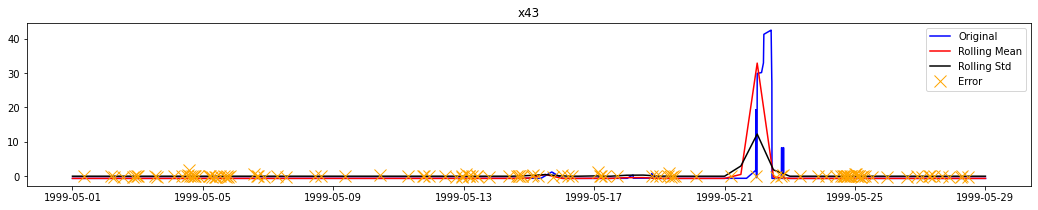

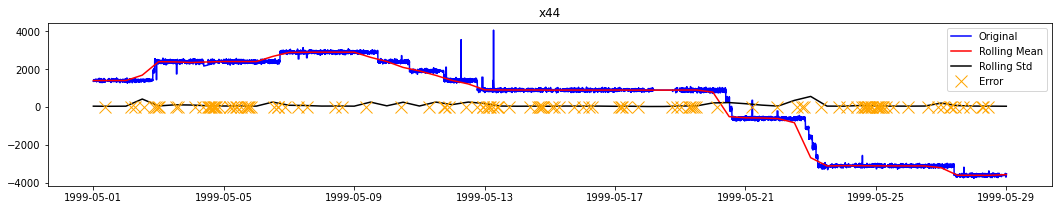

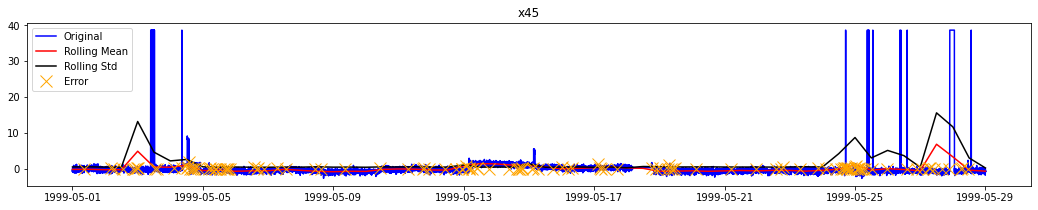

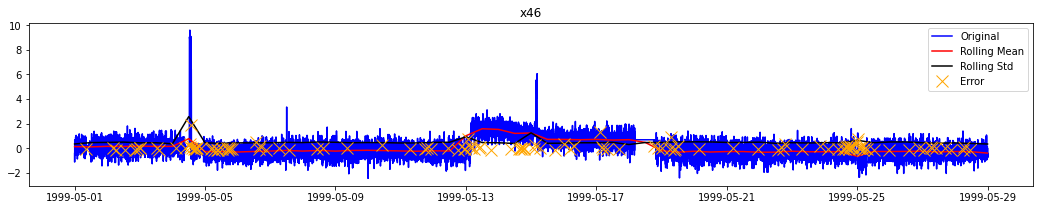

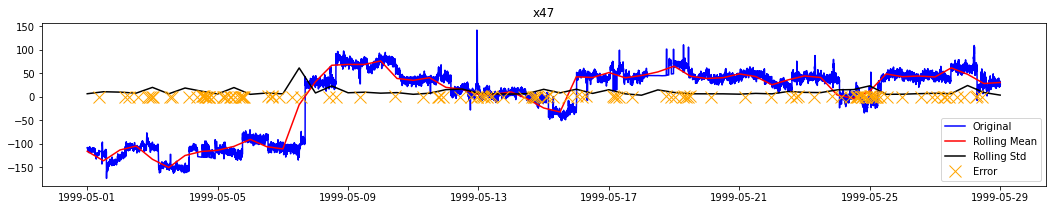

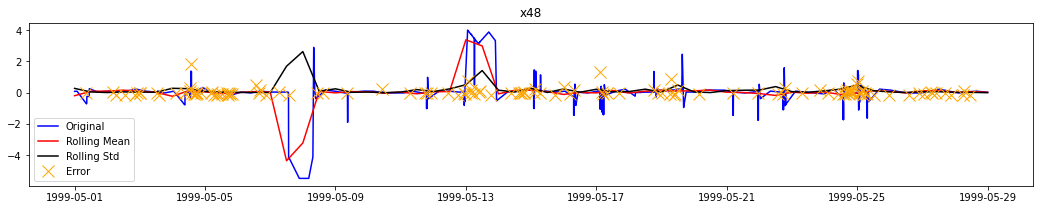

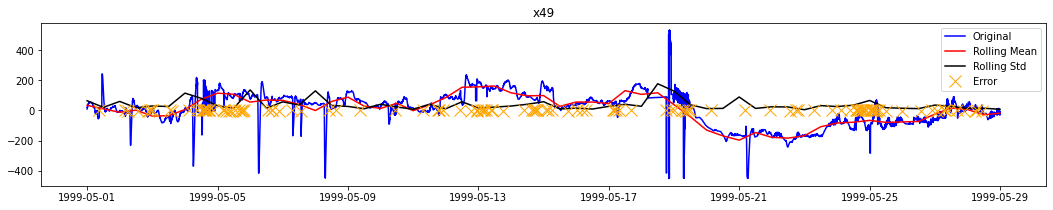

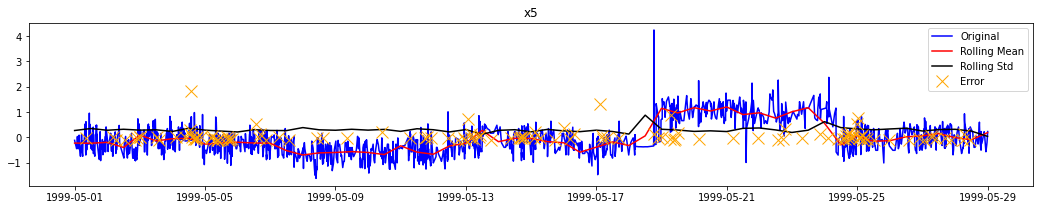

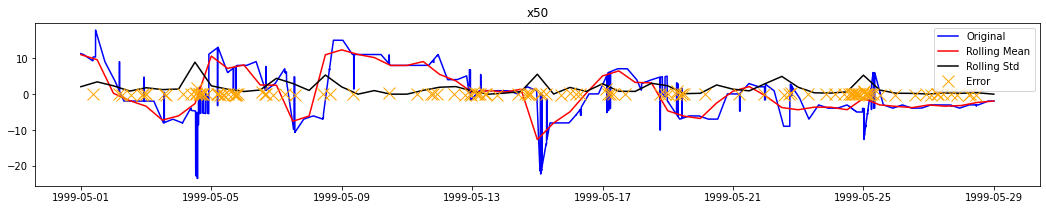

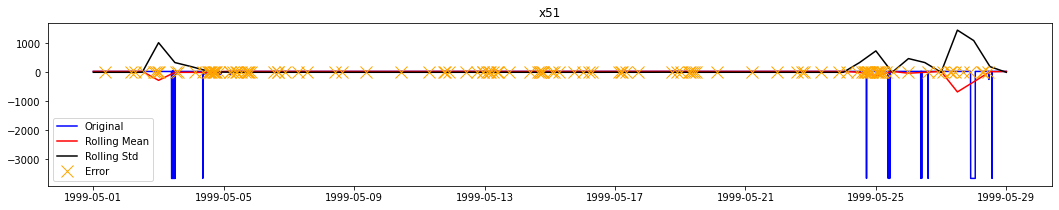

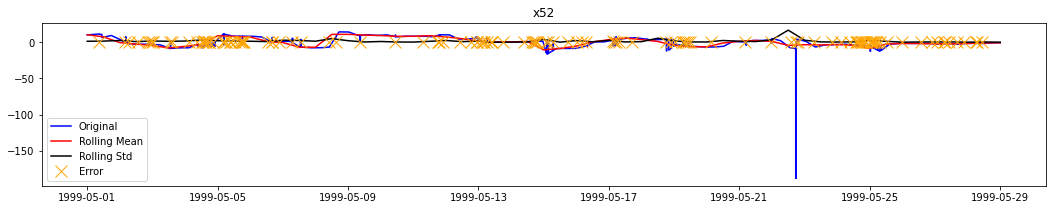

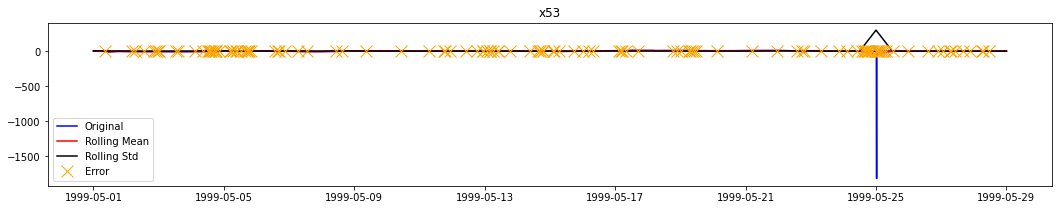

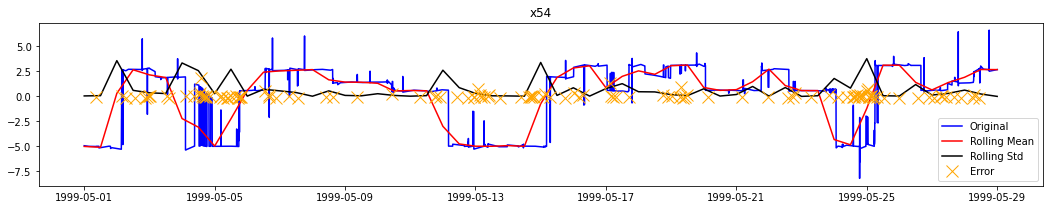

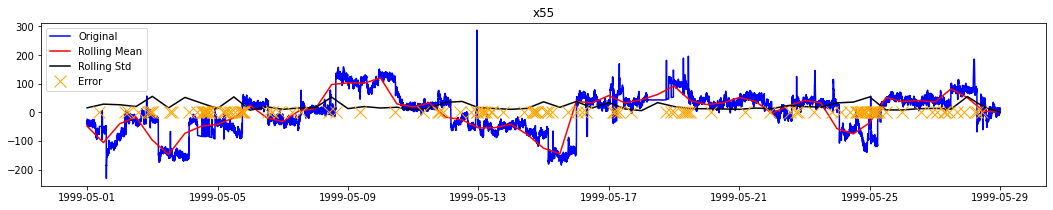

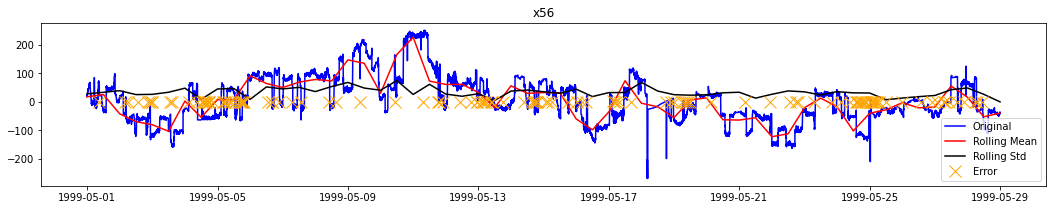

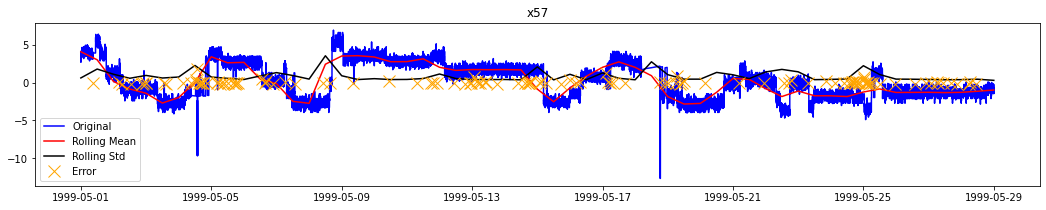

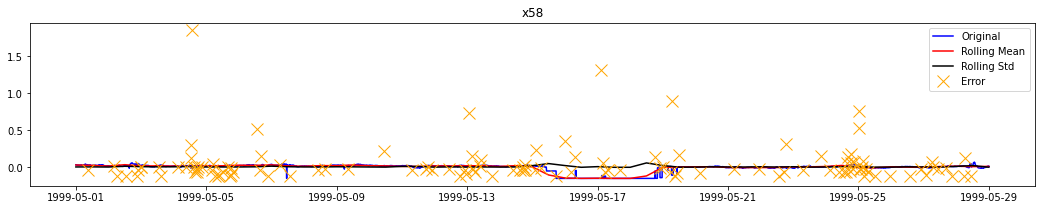

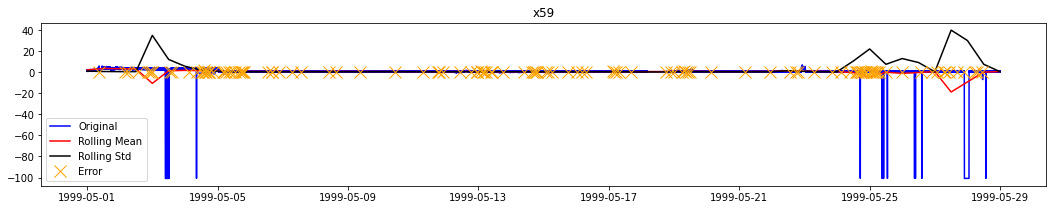

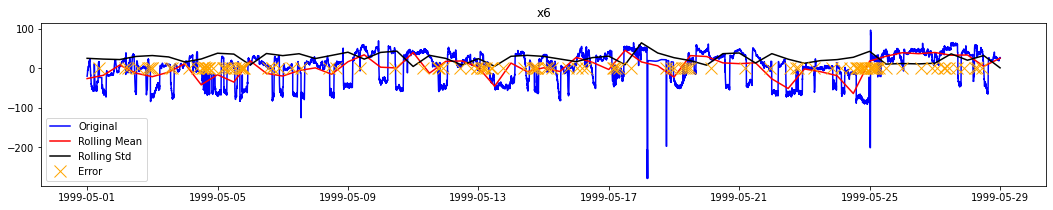

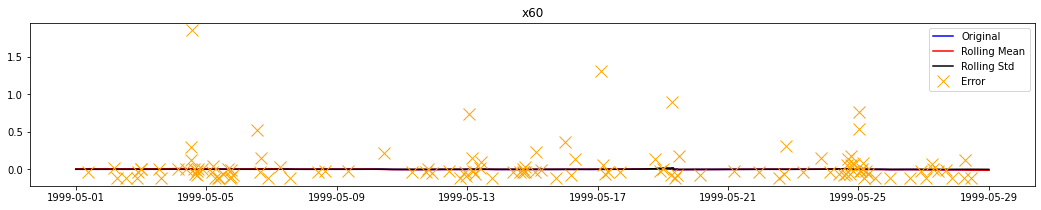

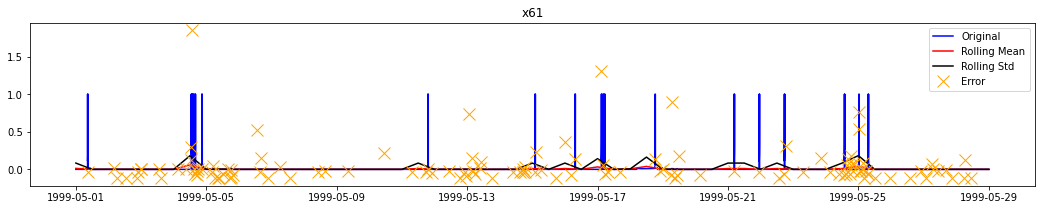

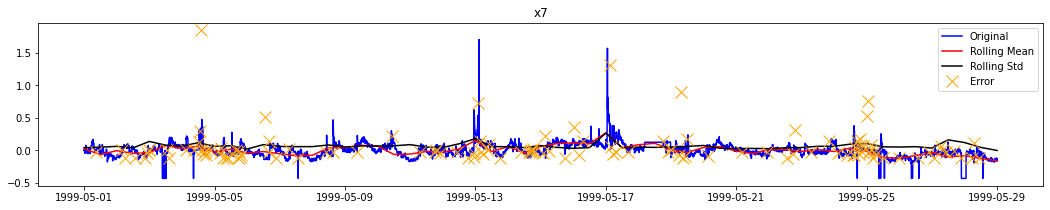

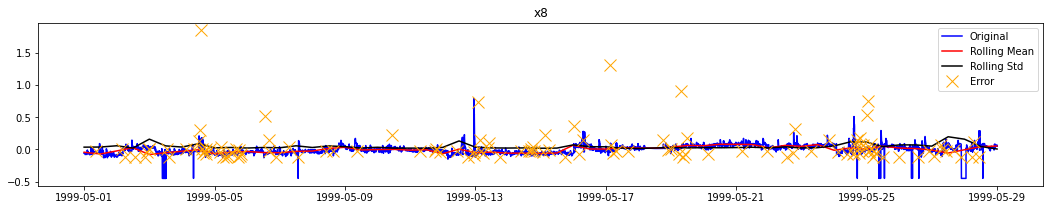

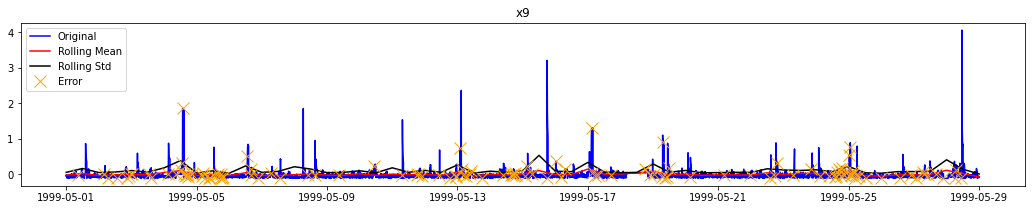

In [21]:
# Resample the entire dataset by daily average
rollmean = df_data_new.resample(rule='720min').mean()  # Rolling mean
rollstd = df_data_new.resample(rule='720min').std()    # Rolling std

# Plot time series for each sensor with its mean and standard deviation
names = getSensorColnames()
for name in names:
    _data_err = df_data_new[df_data_new['y']==1][sensorname]
    
    _ = plt.figure(figsize=FIGSIZE_SENSOR)
    _ = plt.plot(df_data_new[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.plot(_data_err, color='orange', marker='x', linestyle='none', markersize=12, label='Error')
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

## Stationarity and Autocorrelation

The data must be stationary and not autocorrelated

### Autocorrelation

In [22]:
LAGS = 20
ALPHA = 0.05

names = getSensorColnames()

df_autocorr = pd.DataFrame(data=[{"sensor": sensor, "autocorr": df_data_new[sensor].dropna().autocorr(lag=LAGS)} for sensor in names])
df_autocorr.sort_values(by='autocorr', ascending=True, inplace=True)

# Print sensors that seems to be correlated
df_autocorr[df_autocorr['autocorr']<0.9]

sensor  autocorr
35    x41 -0.002606
24    x31  0.007766
48    x53  0.009226
57    x61  0.035170
6     x15  0.121386
1     x10  0.166179
32    x39  0.170023
31    x38  0.188781
10    x19  0.225200
60     x9  0.256893
15    x23  0.502477
40    x46  0.543783
2     x11  0.581251
54    x59  0.591823
39    x45  0.593581
25    x32  0.597606
17    x25  0.604146
46    x51  0.604991
59     x8  0.618567
3     x12  0.627891
34    x40  0.661636
58     x7  0.685940
7     x16  0.726785
8     x17  0.729135
16    x24  0.749263
55     x6  0.762883
30    x37  0.764008
29    x36  0.767361
27    x34  0.771478
0      x1  0.782824
44     x5  0.814539
28    x35  0.821827
22     x3  0.846116
9     x18  0.854824
36    x42  0.858991
47    x52  0.860562
4     x13  0.864135
12    x20  0.864268
43    x49  0.870108
11     x2  0.872855
33     x4  0.893311

There are alot of sensors which are correlated with themselves 

<AxesSubplot:>

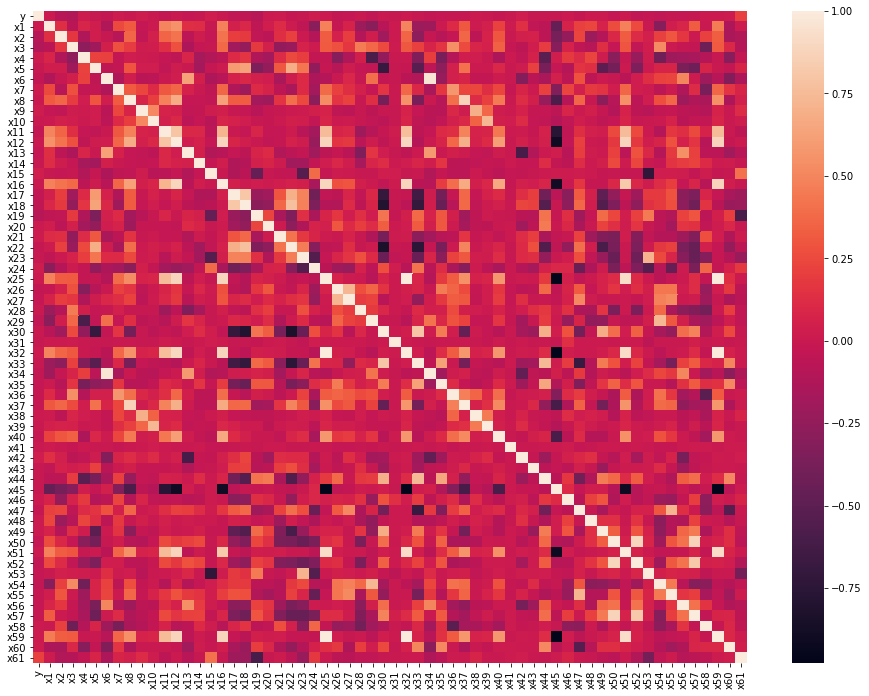

In [23]:
# calculate the correlation matrix
corr = df_data_new.corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Apply PCA and observe importance of features

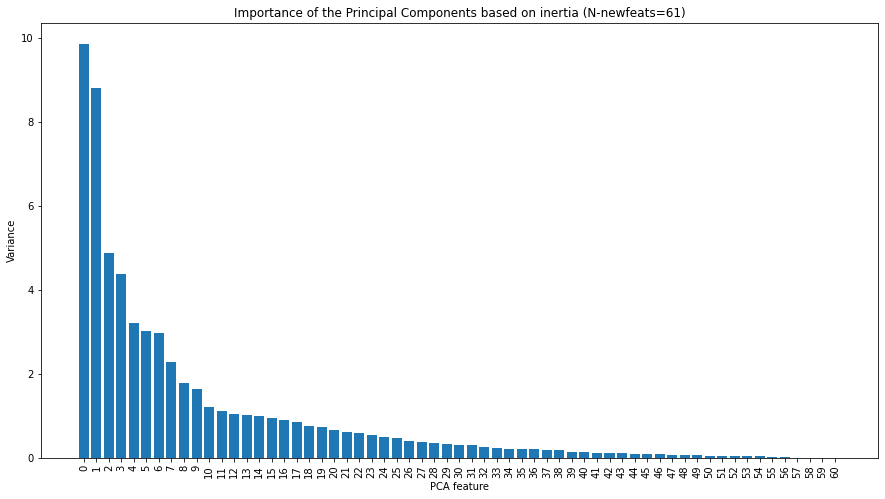

In [24]:
# Perform PCA and look at the most important principal components based on inertia
colnames = getSensorColnames()

# Get data
x = df_data_new[colnames]
n_new_feats = x.shape[1]

# Create processing pipeline
scaler = StandardScaler()
pca = PCA(n_components=n_new_feats)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)


# Plot the principal components against their inertia
new_feat_names = range(0, x.shape[1])
_ = plt.figure(figsize=(15, 8))
_ = plt.bar(new_feat_names, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(new_feat_names)
_ = plt.xticks(rotation=90)
_ = plt.title(f"Importance of the Principal Components based on inertia (N-newfeats={n_new_feats})")
plt.show()

Two features have the most inertia or the importance over other features!

## Save Data

In [25]:
df_data_new.to_csv(PATH_OUT, index=False)

print(f"Cleaned data saved to: {PATH_OUT}")

Cleaned data saved to: data/_processminer-rare-event-mts-data_cleaned.csv
